# Análisis Exploratorio de Datos

**Se importan las librerias que se van a usar**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**Se unen los datasets green trip de los año 2021 - 2024**

**Se carga el archivo**

In [60]:
trip = pd.read_csv("viajes.csv")
trip.head()



,Unnamed: 0,supplier_id,date,year,month,day_name,departure_time,arrival_time,loc_id_depature,district_depature,...,district_arrival,vehicle_type,subtotal,total,tolls,payment_type,distance,cost_miles,travel_time_min,cost_min
0,0,2,2021-01-01,2021,January,Friday,2021-01-01 00:12:57,2021-01-01 23:27:19,260,Manhattan,...,Manhattan,0,10.5,11.80,0.0,2.0,2.65,4.452830,1394.366667,0.008463
1,1,2,2021-01-01,2021,January,Friday,2021-01-01 00:25:24,2021-01-01 00:37:38,151,Queens,...,Brooklyn,0,11.5,12.80,0.0,2.0,2.60,4.923077,12.233333,1.046322
2,2,2,2021-01-01,2021,January,Friday,2021-01-01 06:12:44,2021-01-01 06:31:09,152,Queens,...,Brooklyn,1,22.5,26.05,0.0,2.0,6.75,3.859259,18.416667,1.414480
3,3,2,2021-01-01,2021,January,Friday,2021-01-01 08:08:43,2021-01-01 08:22:06,130,Queens,...,Queens,1,13.0,13.80,0.0,2.0,3.28,4.207317,13.383333,1.031133
4,4,2,2021-01-01,2021,January,Friday,2021-01-01 08:12:30,2021-01-01 08:45:29,197,Manhattan,...,Brooklyn,1,36.0,39.55,0.0,1.0,11.69,3.383234,32.983333,1.199090


In [61]:
trip.drop(columns=['Unnamed: 0'], inplace=True)


In [62]:
trip.head()

,supplier_id,date,year,month,day_name,departure_time,arrival_time,loc_id_depature,district_depature,loc_id_arrival,district_arrival,vehicle_type,subtotal,total,tolls,payment_type,distance,cost_miles,travel_time_min,cost_min
0,2,2021-01-01,2021,January,Friday,2021-01-01 00:12:57,2021-01-01 23:27:19,260,Manhattan,223,Manhattan,0,10.5,11.80,0.0,2.0,2.65,4.452830,1394.366667,0.008463
1,2,2021-01-01,2021,January,Friday,2021-01-01 00:25:24,2021-01-01 00:37:38,151,Queens,74,Brooklyn,0,11.5,12.80,0.0,2.0,2.60,4.923077,12.233333,1.046322
2,2,2021-01-01,2021,January,Friday,2021-01-01 06:12:44,2021-01-01 06:31:09,152,Queens,164,Brooklyn,1,22.5,26.05,0.0,2.0,6.75,3.859259,18.416667,1.414480
3,2,2021-01-01,2021,January,Friday,2021-01-01 08:08:43,2021-01-01 08:22:06,130,Queens,130,Queens,1,13.0,13.80,0.0,2.0,3.28,4.207317,13.383333,1.031133
4,2,2021-01-01,2021,January,Friday,2021-01-01 08:12:30,2021-01-01 08:45:29,197,Manhattan,86,Brooklyn,1,36.0,39.55,0.0,1.0,11.69,3.383234,32.983333,1.199090


In [63]:
trip.shape

(33668, 20)

In [64]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   supplier_id        33668 non-null  int64  
 1   date               33668 non-null  object 
 2   year               33668 non-null  int64  
 3   month              33668 non-null  object 
 4   day_name           33668 non-null  object 
 5   departure_time     33668 non-null  object 
 6   arrival_time       33668 non-null  object 
 7   loc_id_depature    33668 non-null  int64  
 8   district_depature  33668 non-null  object 
 9   loc_id_arrival     33668 non-null  int64  
 10  district_arrival   33668 non-null  object 
 11  vehicle_type       33668 non-null  int64  
 12  subtotal           33668 non-null  float64
 13  total              33668 non-null  float64
 14  tolls              33668 non-null  float64
 15  payment_type       33668 non-null  float64
 16  distance           336

Se corrige el error que nombraba la columna como costo por kilómetro y se pasa a costo por millas, ya que corresponde al sistema de medición estadounidense.

In [65]:
trip.rename(columns={'cost_kilometer': 'cost_miles'}, inplace=True)
trip.columns

Index(['supplier_id', 'date', 'year', 'month', 'day_name', 'departure_time',
       'arrival_time', 'loc_id_depature', 'district_depature',
       'loc_id_arrival', 'district_arrival', 'vehicle_type', 'subtotal',
       'total', 'tolls', 'payment_type', 'distance', 'cost_miles',
       'travel_time_min', 'cost_min'],
      dtype='object')

# 4.1 Análisis univariable
Permite comprender las características generales de cada variable de nuestro set de datos  Iniciemos en las variables categóricas: supplier_id, month, day_name, district_depature, district_arrival, vehicle_type y payment_type.

### **Análisis de la variable categórica: supplier_id**

In [66]:
unique_values = trip["supplier_id"].unique()
print(unique_values)

[2 1 6]


In [67]:
trip["supplier_id"].value_counts()

supplier_id
2    26276
1     7376
6       16
Name: count, dtype: int64

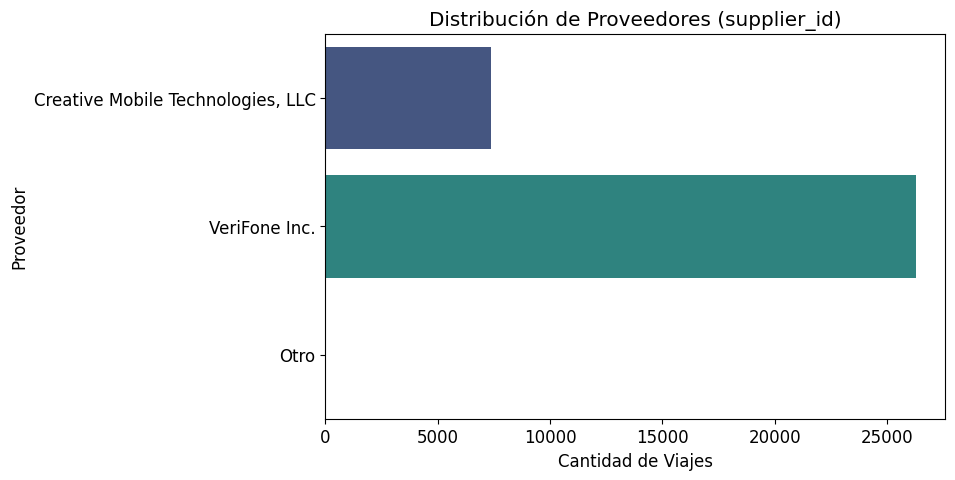

count    33668.000000
mean         1.782820
std          0.423701
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: supplier_id, dtype: float64


In [68]:
# Filtrar los valores nulos en 'supplier_id'
trip = trip.dropna(subset=['supplier_id'])

# Crear el gráfico de barras
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=trip, y='supplier_id', palette='viridis', order=[1, 2, 6])  # Ordena los valores de supplier_id
plt.title("Distribución de Proveedores (supplier_id)")
plt.xlabel("Cantidad de Viajes")
plt.ylabel("Proveedor")

# Cambiar las etiquetas del eje y para mostrar nombres en lugar de IDs
ax.set_yticklabels(['Creative Mobile Technologies, LLC', 'VeriFone Inc.', 'Otro'])

plt.show()

# Resumen estadístico de 'supplier_id'
print(trip['supplier_id'].describe())


Los proveedores que corresponden a esta variable son 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc. El valor promedio es 1.78, lo que sugiere que el proveedor con el supplier id:1 es el más común, ya que el promedio está más cerca de 1.
La desviación estándar es 0.42, lo que indica que hay algo de dispersión en los valores, pero no es excesiva. Los datos están relativamente concentrados alrededor del valor promedio.

### **Análisis de la variable categórica: month**

In [69]:
unique_values = trip["month"].unique()
print(unique_values)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [70]:
trip["month"].value_counts()

month
August       3063
June         3062
March        3061
April        3061
May          3061
July         3060
January      3059
February     3058
December     2297
October      2296
November     2296
September    2294
Name: count, dtype: int64

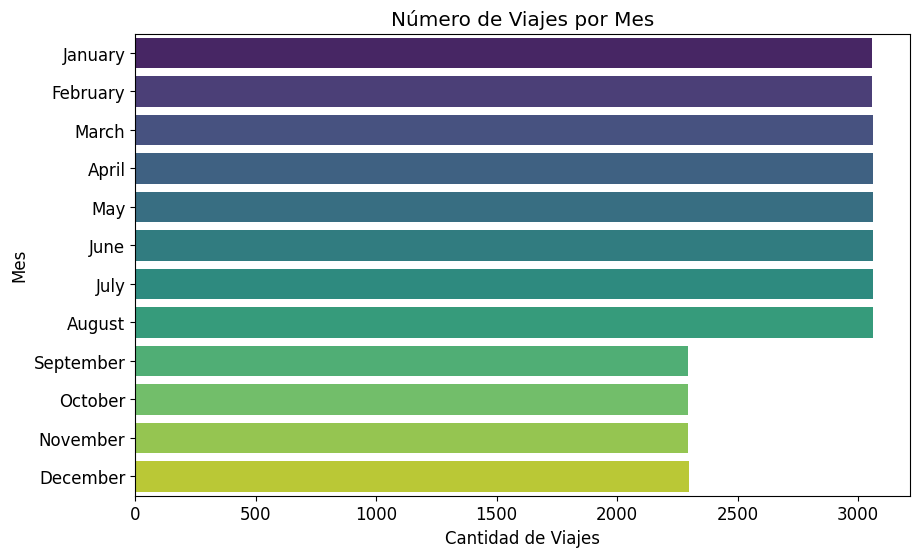

count      33668
unique        12
top       August
freq        3063
Name: month, dtype: object


In [71]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10, 6))
sns.countplot(data=trip, y='month', palette='viridis', order=month_order)
plt.title("Número de Viajes por Mes")
plt.xlabel("Cantidad de Viajes")
plt.ylabel("Mes")
plt.show()


print(trip['month'].describe())


Agosto lidera la lista con la mayor cantidad de viajes, seguido de cerca por Junio y los meses de Marzo, Abril y Mayo. Esto sugiere que la demanda de taxis es relativamente alta durante los meses de verano (junio, julio, agosto), probablemente debido a las mejores condiciones climáticas, mayor actividad turística y eventos especiales.

### **Análisis de la variable categórica: day_name**

In [72]:
unique_values = trip["day_name"].unique()
print(unique_values)

['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [73]:
trip["day_name"].value_counts()

day_name
Wednesday    5141
Thursday     5128
Friday       5037
Tuesday      4869
Saturday     4714
Monday       4571
Sunday       4208
Name: count, dtype: int64

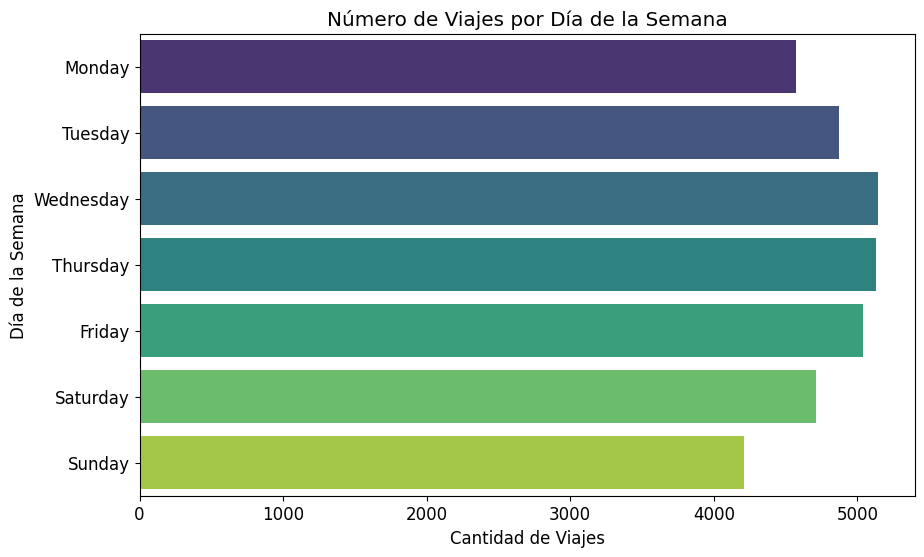

count         33668
unique            7
top       Wednesday
freq           5141
Name: day_name, dtype: object

In [110]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10, 6))
sns.countplot(data=trip, y='day_name', palette='viridis', order=day_order)
plt.title("Número de Viajes por Día de la Semana")
plt.xlabel("Cantidad de Viajes")
plt.ylabel("Día de la Semana")
plt.show()
trip['day_name'].describe()


Los datos muestran un patrón de alta actividad en los días laborables y una ligera disminución en el fin de semana, especialmente los domingos.
Miércoles y Jueves son los días con la mayor cantidad de viajes. Esto podría indicar que la mitad de la semana es un período activo, posiblemente debido a actividades de trabajo.
A pesar de la disminución de viajes el domingo, el sábado aún registra una cantidad relativamente alta (4,714 viajes), lo que puede reflejar actividades de ocio o compras.

### **Análisis de la variable categórica: district_depature y district_arrival**

In [75]:
unique_values = trip["district_depature"].unique()
print(unique_values)

['Manhattan' 'Queens' 'Brooklyn' 'Bronx']


In [76]:
trip["district_depature"].value_counts()

district_depature
Brooklyn     13432
Manhattan    10512
Queens        8900
Bronx          824
Name: count, dtype: int64

In [77]:
unique_values = trip["district_arrival"].unique()
print(unique_values)

['Manhattan' 'Brooklyn' 'Queens' 'Bronx']


In [78]:
trip["district_arrival"].value_counts()

district_arrival
Manhattan    13573
Queens       10839
Brooklyn      8793
Bronx          463
Name: count, dtype: int64

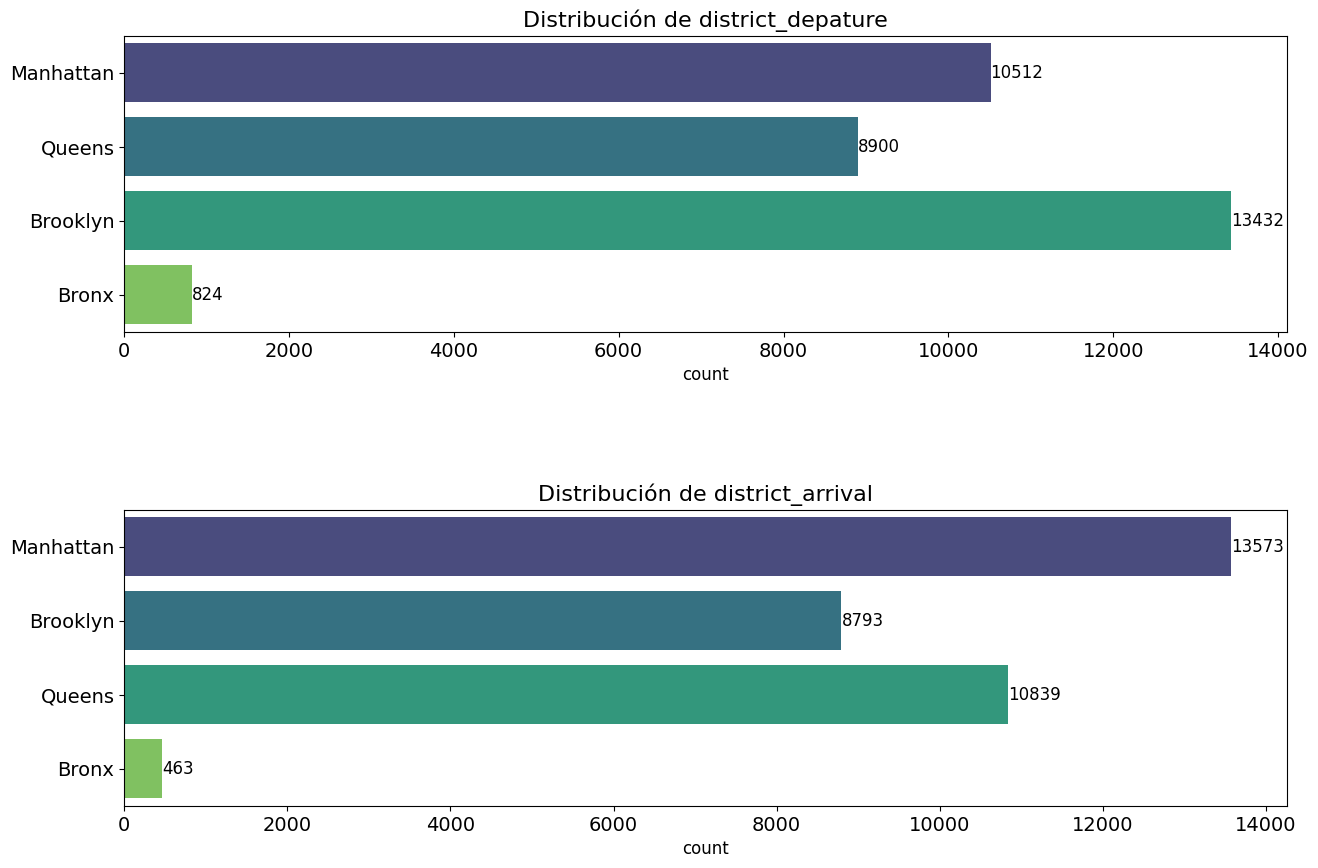

Análisis de la variable 'district_depature':
district_depature
Brooklyn     13432
Manhattan    10512
Queens        8900
Bronx          824
Name: count, dtype: int64


Análisis de la variable 'district_arrival':
district_arrival
Manhattan    13573
Queens       10839
Brooklyn      8793
Bronx          463
Name: count, dtype: int64




In [79]:
plt.rcParams['font.family'] = 'DejaVu Sans'
col_cat = ["district_depature", "district_arrival"]
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.6)
for i, col in enumerate(col_cat):
    sns.countplot(y=col, data=trip, ax=ax[i], hue=col, palette='viridis', dodge=False)

    # Configurar título y etiquetas
    ax[i].set_title(f"Distribución de {col}", fontsize=16)
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y', labelsize=14)
    ax[i].tick_params(axis='x', labelsize=14)
    for p in ax[i].patches:
        width = p.get_width()
        ax[i].annotate(f'{int(width)}', (width + 0.5, p.get_y() + p.get_height() / 2),
                       fontsize=12, color='black', ha='left', va='center')
plt.show()
for col in col_cat:
    counts = trip[col].value_counts()
    print(f"Análisis de la variable '{col}':")
    print(counts)
    print("\n")

Brooklyn tiene la mayor cantidad de salidas con 13,432 viajes, lo cual representa un volumen significativo. Esto podría indicar una gran densidad poblacional o una alta actividad económica en el distrito, con personas que requieren transporte para trasladarse dentro y fuera de Brooklyn.
Manhattan es el segundo en cantidad de salidas, con 10,512 viajes, lo cual es consistente con el hecho de que Manhattan es el centro financiero y turístico de la ciudad.
Bronx tiene el menor número de salidas, con 824 viajes. Esta baja actividad podría deberse a una menor densidad de oficinas y actividad comercial, en comparación con Manhattan y Brooklyn.

 ### **Análisis de la variable categórica: vehicle_type**

In [80]:
unique_values = trip["vehicle_type"].unique()
print(unique_values)

[0 1]


In [81]:
trip["vehicle_type"].value_counts()

vehicle_type
0    16893
1    16775
Name: count, dtype: int64

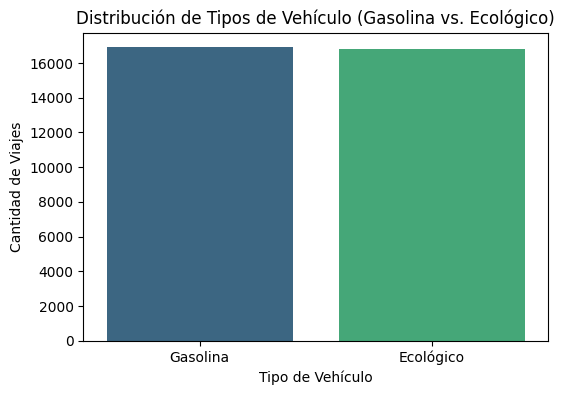

In [82]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(6, 4))
sns.countplot(data=trip, x='vehicle_type', palette='viridis')
plt.title("Distribución de Tipos de Vehículo (Gasolina vs. Ecológico)")
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Cantidad de Viajes")
# Cambiar temporalmente las etiquetas de los ticks en el eje x
plt.xticks(ticks=[0, 1], labels=["Gasolina", "Ecológico"])

plt.show()



La diferencia en el número de viajes entre vehículos a gasolina y vehículos ecológicos es mínima, apenas 118 viajes más para los vehículos a gasolina. Esta cercanía sugiere que ambos tipos de vehículos están casi igualmente representados en la flota de taxis.
Este equilibrio puede indicar que la ciudad o el sistema de taxis está en una etapa avanzada de transición hacia la sostenibilidad, ya que los vehículos ecológicos están prácticamente al nivel de los vehículos tradicionales en cuanto a uso.
ESTO SE EXPLICA POR LAS MUESTRAS TOMADAS DE CADA UNO

 ### **Análisis de la variable categórica:  payment_type**

In [83]:
unique_values = trip["payment_type"].unique()
print(unique_values)

[2. 1. 0. 3. 4. 5.]


In [84]:
trip["payment_type"].value_counts()

payment_type
1.0    23241
2.0     8981
0.0     1135
4.0      156
3.0      153
5.0        2
Name: count, dtype: int64

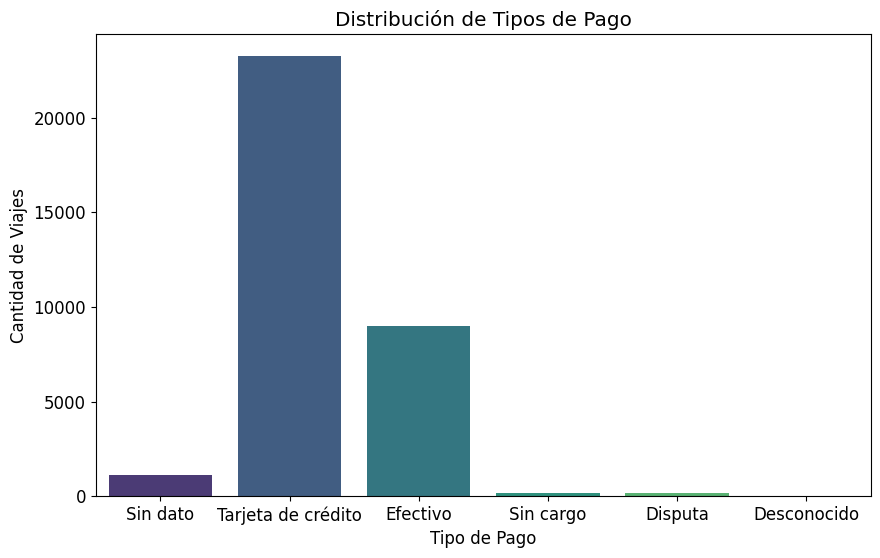

In [85]:
# Mapeo de códigos a etiquetas de pago
payment_labels = {
    1: 'Tarjeta de crédito',
    2: 'Efectivo',
    3: 'Sin cargo',
    4: 'Disputa',
    5: 'Desconocido',
    0: 'Sin dato'
}
plt.rcParams['font.size'] = 12
plt.figure(figsize=(10, 6))
sns.countplot(data=trip, x='payment_type', palette='viridis')
plt.xticks(ticks=list(payment_labels.keys()), labels=list(payment_labels.values()))
plt.title("Distribución de Tipos de Pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Cantidad de Viajes")
plt.show()


La mayoría de los viajes (23,241) fueron pagados con tarjeta de crédito, representando el método de pago más popular con una gran diferencia sobre los demás. Esto podría deberse a la conveniencia, seguridad y aceptación generalizada del pago con tarjeta en taxis, especialmente en áreas urbanas densas como Nueva York.
Existen 1,135 viajes donde el método de pago se registró como sin dato. Esta categoría podría incluir errores de registro o casos en los que el tipo de pago no se documentó correctamente.

### **Análisis de las variables numéricas**

### **Variable numérica: distance**

In [86]:
unique_values = trip['distance'].unique()
print(unique_values)

[ 2.65  2.6   6.75 ... 26.95 12.34 11.36]


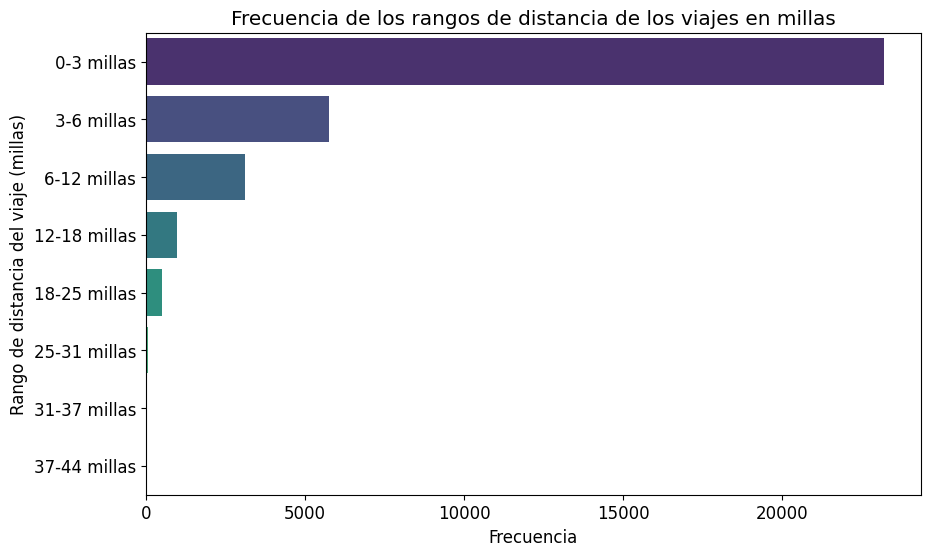

  Rango de Distancia (millas)  Número de Viajes  Porcentaje de Viajes
0                  0-3 millas             23193                 68.94
1                  3-6 millas              5757                 17.11
2                 6-12 millas              3106                  9.23
3                12-18 millas               981                  2.92
4                18-25 millas               520                  1.55
5                25-31 millas                61                  0.18
6                31-37 millas                14                  0.04
7                37-44 millas                 9                  0.03
count     33668.000000
mean         36.163312
std        1708.410376
min           0.000000
25%           1.120000
50%           1.910000
75%           3.630000
max      152701.680000
Name: distance, dtype: float64


In [87]:
bins = [0, 3, 6, 12, 18, 25, 31, 37, 44]
labels = ['0-3 millas', '3-6 millas', '6-12 millas', '12-18 millas', '18-25 millas', '25-31 millas', '31-37 millas', '37-44 millas']
trip['Distancia_rango_millas'] = pd.cut(trip['distance'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.countplot(y='Distancia_rango_millas', data=trip, palette='viridis', order=labels)
plt.title("Frecuencia de los rangos de distancia de los viajes en millas")
plt.xlabel("Frecuencia")
plt.ylabel("Rango de distancia del viaje (millas)")
plt.show()
trip_counts = trip['Distancia_rango_millas'].value_counts().reindex(labels, fill_value=0)
total_trips = trip_counts.sum()
df_trip_percentages = pd.DataFrame({
    'Rango de Distancia (millas)': trip_counts.index,
    'Número de Viajes': trip_counts.values,
    'Porcentaje de Viajes': (trip_counts.values / total_trips) * 100
})
df_trip_percentages['Porcentaje de Viajes'] = df_trip_percentages['Porcentaje de Viajes'].round(2)
print(df_trip_percentages)
print(trip['distance'].describe())

La mayoría de los viajes (aproximadamente el 69%) tienen distancias de hasta 3 millas. Esto es consistente con la expectativa de que la mayoría de los viajes en áreas urbanas son de corta distancia, probablemente dentro de un mismo barrio o entre zonas cercanas de la ciudad.
Dado que la mayoría de los viajes son cortos (menos de 6 millas), sería recomendable enfocarse en la optimización de las rutas para estos trayectos. Esto podría incluir mejoras en la asignación de vehículos en áreas densamente pobladas y el aumento de la eficiencia en el tiempo de espera.


In [88]:
trip.head()

,supplier_id,date,year,month,day_name,departure_time,arrival_time,loc_id_depature,district_depature,loc_id_arrival,...,vehicle_type,subtotal,total,tolls,payment_type,distance,cost_miles,travel_time_min,cost_min,Distancia_rango_millas
0,2,2021-01-01,2021,January,Friday,2021-01-01 00:12:57,2021-01-01 23:27:19,260,Manhattan,223,...,0,10.5,11.80,0.0,2.0,2.65,4.452830,1394.366667,0.008463,0-3 millas
1,2,2021-01-01,2021,January,Friday,2021-01-01 00:25:24,2021-01-01 00:37:38,151,Queens,74,...,0,11.5,12.80,0.0,2.0,2.60,4.923077,12.233333,1.046322,0-3 millas
2,2,2021-01-01,2021,January,Friday,2021-01-01 06:12:44,2021-01-01 06:31:09,152,Queens,164,...,1,22.5,26.05,0.0,2.0,6.75,3.859259,18.416667,1.414480,6-12 millas
3,2,2021-01-01,2021,January,Friday,2021-01-01 08:08:43,2021-01-01 08:22:06,130,Queens,130,...,1,13.0,13.80,0.0,2.0,3.28,4.207317,13.383333,1.031133,3-6 millas
4,2,2021-01-01,2021,January,Friday,2021-01-01 08:12:30,2021-01-01 08:45:29,197,Manhattan,86,...,1,36.0,39.55,0.0,1.0,11.69,3.383234,32.983333,1.199090,6-12 millas


### **Variable numérica:  'total'**

In [113]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   supplier_id             33668 non-null  int64   
 1   date                    33668 non-null  object  
 2   year                    33668 non-null  int64   
 3   month                   33668 non-null  object  
 4   day_name                33668 non-null  object  
 5   departure_time          33668 non-null  object  
 6   arrival_time            33668 non-null  object  
 7   loc_id_depature         33668 non-null  int64   
 8   district_depature       33668 non-null  object  
 9   loc_id_arrival          33668 non-null  int64   
 10  district_arrival        33668 non-null  object  
 11  vehicle_type            33668 non-null  int64   
 12  subtotal                33668 non-null  float64 
 13  total                   33668 non-null  float64 
 14  tolls                 

In [89]:
unique_values = trip['total'].unique()
print(unique_values)

[11.8  12.8  26.05 ... 81.19 87.53 96.49]


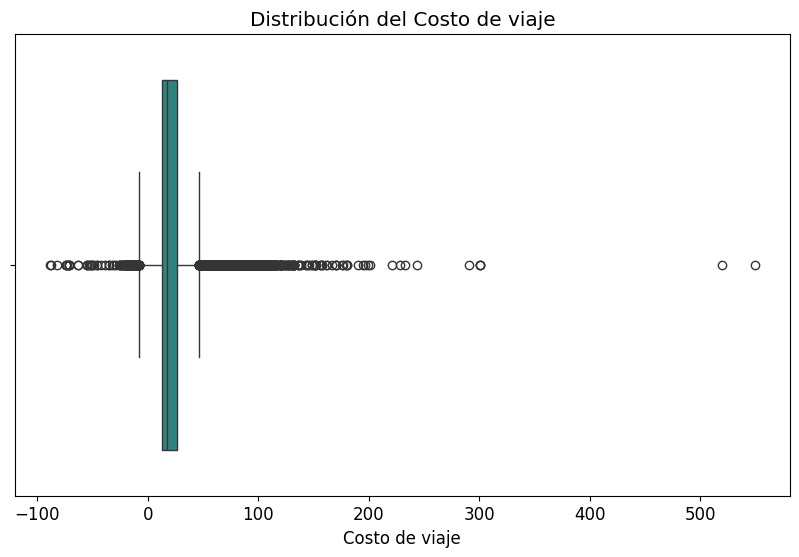

count    33668.000000
mean        22.811087
std         18.555702
min        -88.500000
25%         12.600000
50%         17.640000
75%         26.160000
max        549.100000
Name: total, dtype: float64

In [90]:
plt.figure(figsize=(10, 6))

# Crear boxplot con color viridis
sns.boxplot(x=trip['total'], palette='viridis')
plt.title("Distribución del Costo de viaje")
plt.xlabel("Costo de viaje")
plt.show()
trip['total'].describe()

El promedio de la tarifa es 22.81, lo que sugiere que la mayoría de las tarifas se concentran en torno a este valor. Sin embargo, esta cifra puede estar influenciada por algunos valores extremos (tarifas inusualmente altas o bajas).
La desviación estándar de 18.56 es bastante alta en relación con la media, lo que indica que existe una gran variabilidad en los costos de las tarifas. Es decir, algunas tarifas son mucho más altas o más bajas que el promedio. Esto también podría ser un indicio de la presencia de valores atípicos (por ejemplo, tarifas extremadamente altas o bajas).

### **Variables numéricas: year**

In [91]:
unique_values = trip['year'].unique()
print(unique_values)

[2021 2022 2023 2024]


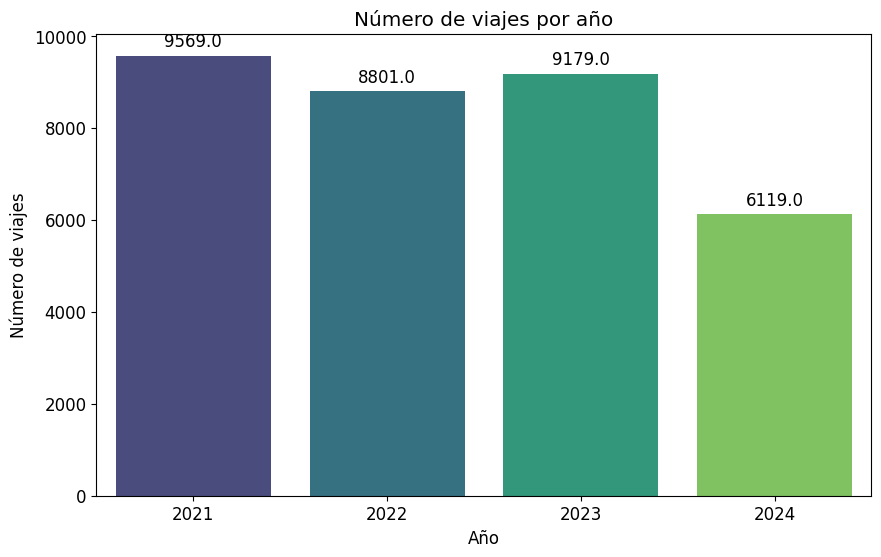

count    33668.000000
mean      2022.351907
std          1.077045
min       2021.000000
25%       2021.000000
50%       2022.000000
75%       2023.000000
max       2024.000000
Name: year, dtype: float64

In [92]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='year', data=trip, palette='viridis')

# Etiquetar las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Título y etiquetas
plt.title("Número de viajes por año")
plt.xlabel("Año")
plt.ylabel("Número de viajes")
plt.show()
trip['year'].describe()


El promedio es 2022.35, lo que sugiere que la mayoría de los registros están cerca del año 2022, aunque el valor decimal puede indicar que hay algunos valores adicionales cercanos a los márgenes de los años (es decir, algunos registros probablemente están al final del año 2022 o principios del 2023).
La desviación estándar de 1.08 es bastante baja, lo que indica que la mayoría de los valores están muy cerca del promedio de 2022. Esto sugiere que la variable podría estar representando años de una muestra donde los datos están concentrados en pocos años, con poca variabilidad.

In [116]:
max_price = trip['subtotal'].max()                 
median_price = np.median(trip['subtotal'])           
q1 = np.quantile(trip['subtotal'], q=0.25)         
q3 = np.quantile(trip['subtotal'], q=0.75)         
iqr = q3 - q1                                       
lim_sup = q3 + 1.5*iqr  

In [117]:
precio_max_fila = trip.loc[trip['subtotal'].idxmax()]
distancia = precio_max_fila['distance']
print(f'El precio máximo es {max_price} y corresponde al trayecto de {distancia} millas')

El precio máximo es 547.6 y corresponde al trayecto de 75.27 millas


In [119]:
outliers = trip[trip['subtotal'] > lim_sup][['distance','subtotal']]
print('Los viajes con precio outlier son:\n')
for idx, row in outliers.iterrows():
    print(f"Una distancia de {row['distance']} millas hasta con un costo de {row['subtotal']}")

Los viajes con precio outlier son:

Una distancia de 18.07 millas hasta con un costo de 52.0
Una distancia de 0.0 millas hasta con un costo de 39.2
Una distancia de 14.7 millas hasta con un costo de 39.0
Una distancia de 13.07 millas hasta con un costo de 40.5
Una distancia de 12.47 millas hasta con un costo de 45.84
Una distancia de 12.26 millas hasta con un costo de 39.5
Una distancia de 10.24 millas hasta con un costo de 57.0
Una distancia de 16.55 millas hasta con un costo de 50.0
Una distancia de 9.58 millas hasta con un costo de 53.5
Una distancia de 25.6 millas hasta con un costo de 79.33
Una distancia de 14.23 millas hasta con un costo de 40.5
Una distancia de 19.18 millas hasta con un costo de 52.0
Una distancia de 29.4 millas hasta con un costo de 78.0
Una distancia de 19.71 millas hasta con un costo de 56.0
Una distancia de 14.82 millas hasta con un costo de 41.5
Una distancia de 14.31 millas hasta con un costo de 42.5
Una distancia de 0.0 millas hasta con un costo de 46.2
U

In [120]:
outliers.count()

distance    2790
subtotal    2790
dtype: int64

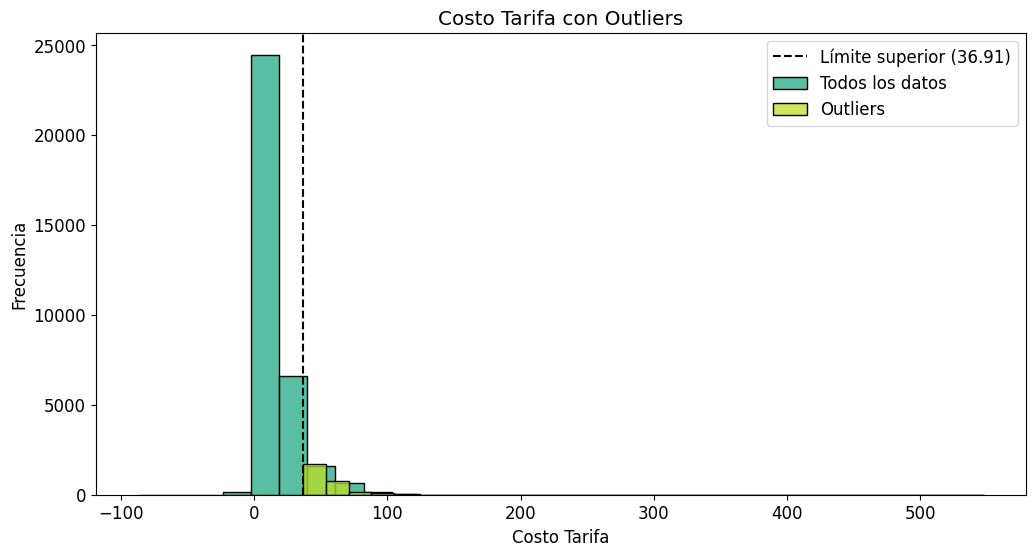

In [121]:
plt.figure(figsize=(12, 6))
sns.histplot(trip['subtotal'], bins=30, kde=False, color=sns.color_palette('viridis', as_cmap=True)(0.6), label='Todos los datos')

# Crear un histograma de los outliers sobre el mismo gráfico
sns.histplot(outliers['subtotal'], bins=30, kde=False, color=sns.color_palette('viridis', as_cmap=True)(0.9), label='Outliers')

# Añadir detalles al gráfico
plt.axvline(x=lim_sup, color='black', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')
plt.title('Costo Tarifa con Outliers')
plt.xlabel('Costo Tarifa')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### **El gráfico evidencia que:**
La mayoría de los costos de tarifa se concentran entre 0 y 50. Esto significa que la mayoría de los viajes tienen un costo relativamente bajo.
La línea vertical negra marca un límite a partir del cual se consideran los datos como "outliers". Al parecer, hay una cantidad significativa de viajes con costos de tarifa muy altos, por encima de este límite. Estos valores atípicos podrían corresponder a viajes especiales, errores en los datos o situaciones excepcionales.
También se observan algunos viajes con costos de tarifa negativos. Esto podría indicar errores en los datos, reembolsos o algún tipo de descuento.

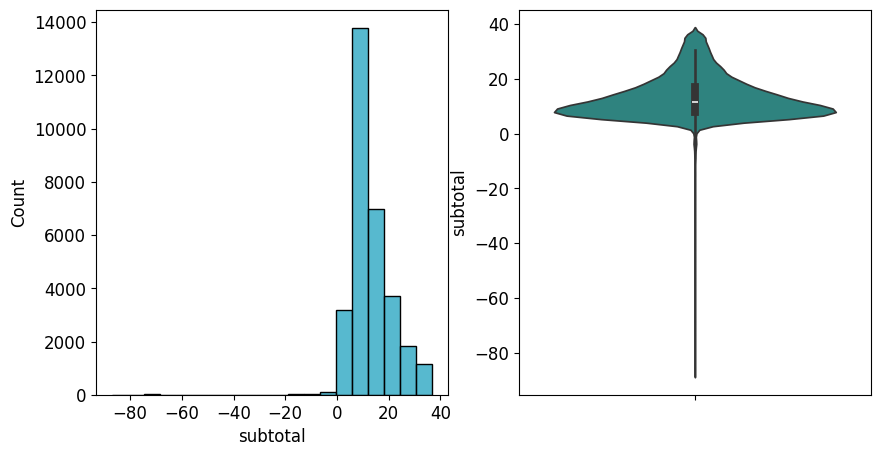

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

ax1 = sns.histplot(trip[trip['subtotal'] < lim_sup]['subtotal'], bins=20, ax= ax1, color='#1FA2BF')
ax2 = sns.violinplot(trip[trip['subtotal'] < lim_sup]['subtotal'], ax= ax2, palette='viridis')

### Del gráfico es posible constatar que:
Los datos están sesgados hacia la izquierda, lo que significa que hay una mayor concentración de valores bajos (costos de tarifa cercanos a 0) en comparación con los valores altos. La mayoría de los viajes tienen un costo de tarifa relativamente bajo.

### **Histograma de las variables numéricas**

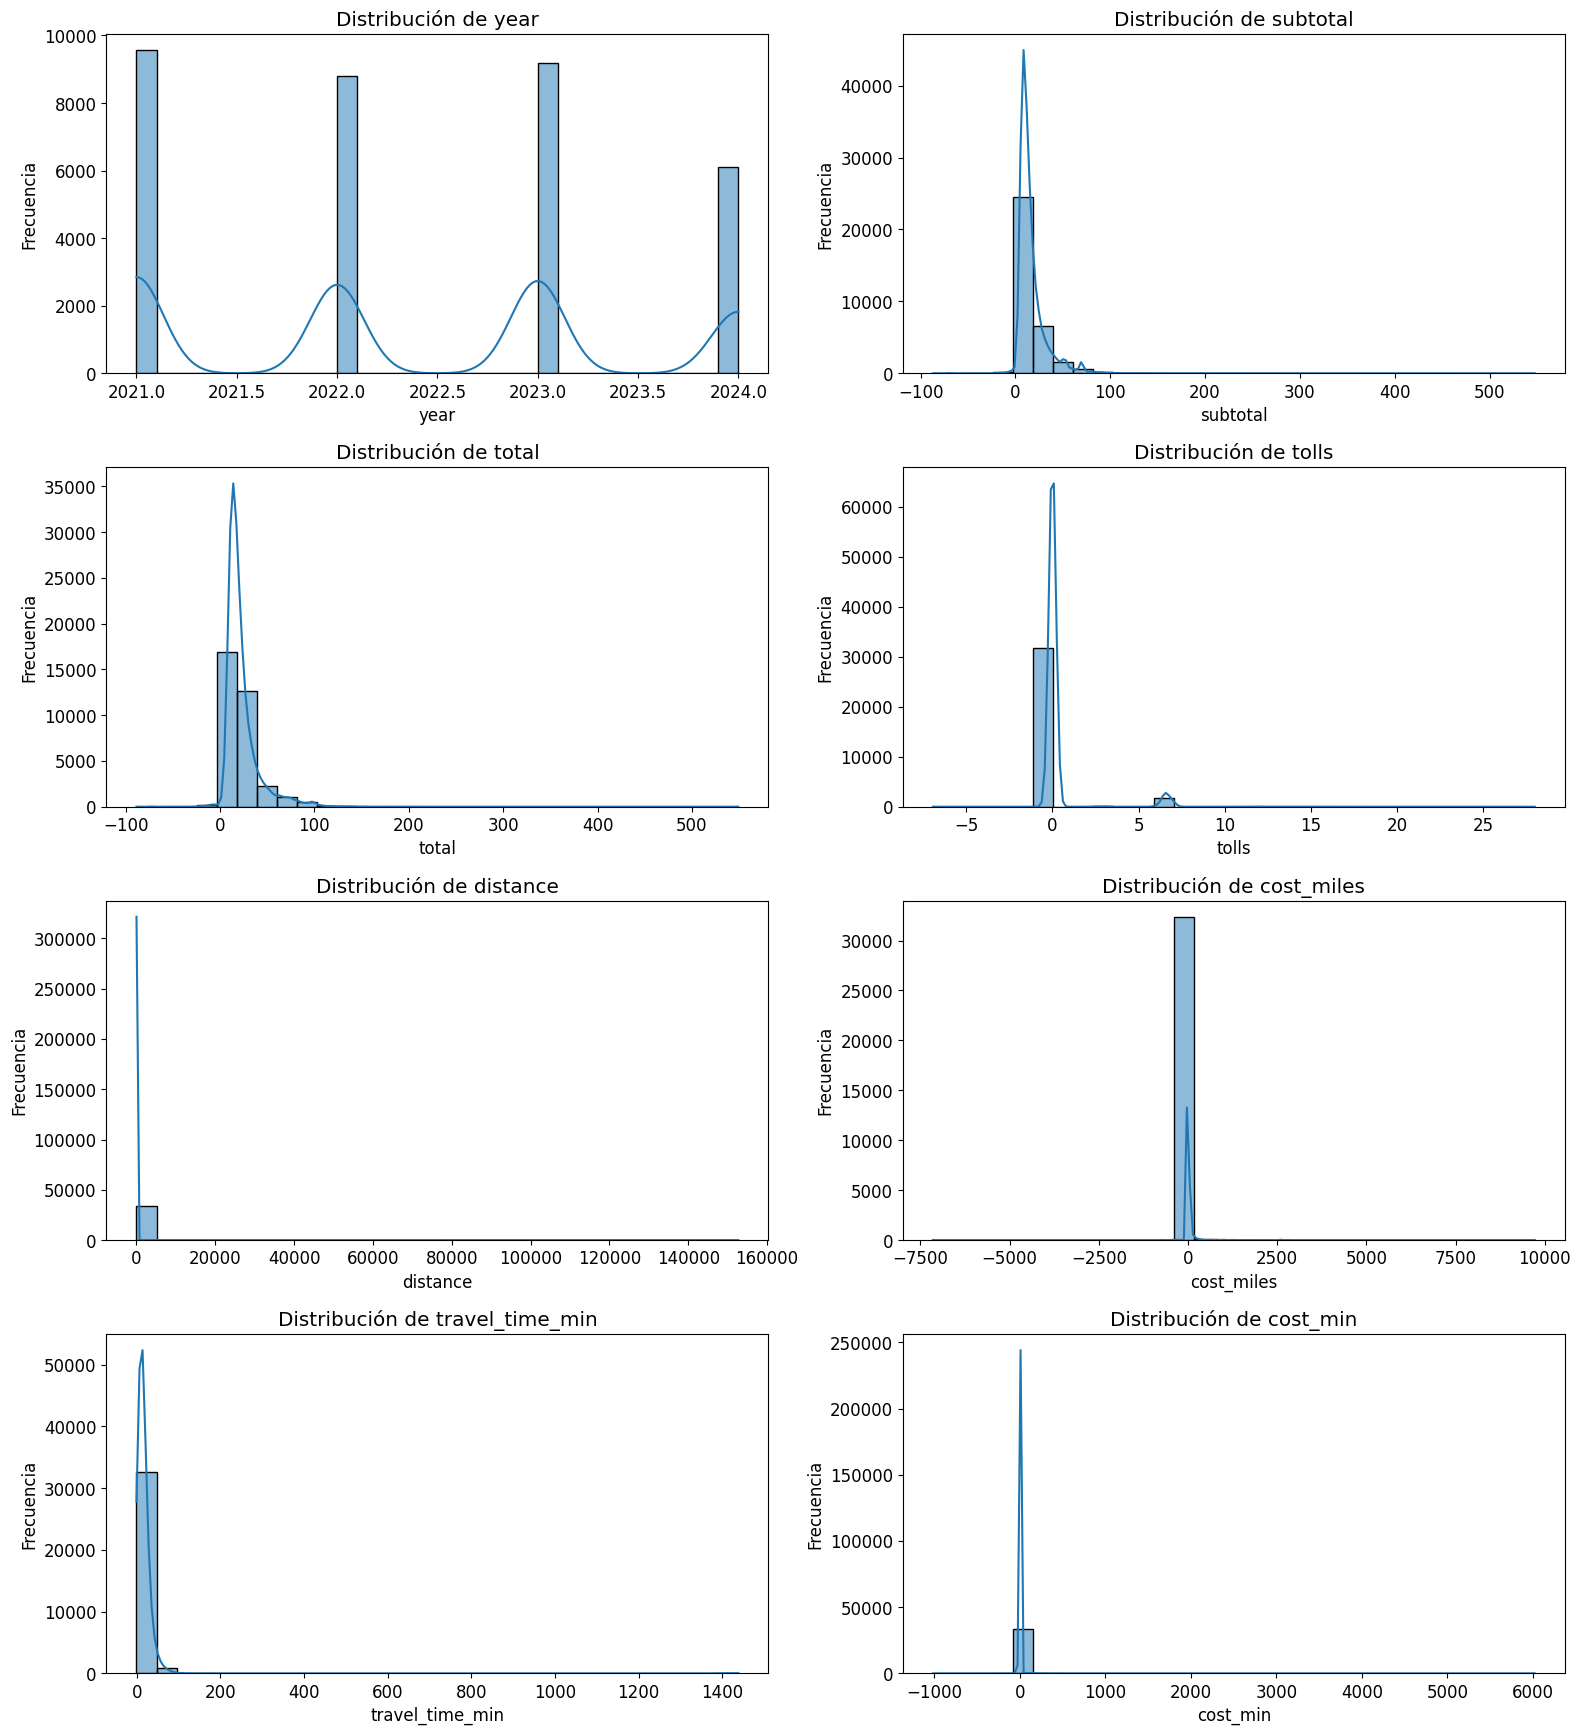

In [124]:
numerical_columns = ['year', 'subtotal', 'total', 'tolls','distance', 
                     'cost_miles', 'travel_time_min', 'cost_min']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 30))
axes = axes.flatten()
for ax, column in zip(axes, numerical_columns):
    sns.histplot(trip[column], bins=30, kde=True, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()


### **Interpretación del subplot de histogramas**
#### **Variables Numéricas**
##### Año, Distancia, Tiempo de Viaje, Costo por Milla, Costo por Minuto: 
Estas variables presentan una distribución sesgada a la derecha. Esto significa que la mayoría de los valores se concentran en el extremo inferior, con algunos valores atípicos en el extremo superior.
##### Subtotal, Total, Peajes: 
Estas variables también muestran una distribución sesgada a la derecha, indicando que la mayoría de los viajes tienen costos bajos, mientras que unos pocos tienen costos significativamente más altos.

### **Boxplots de las variables numéricas**

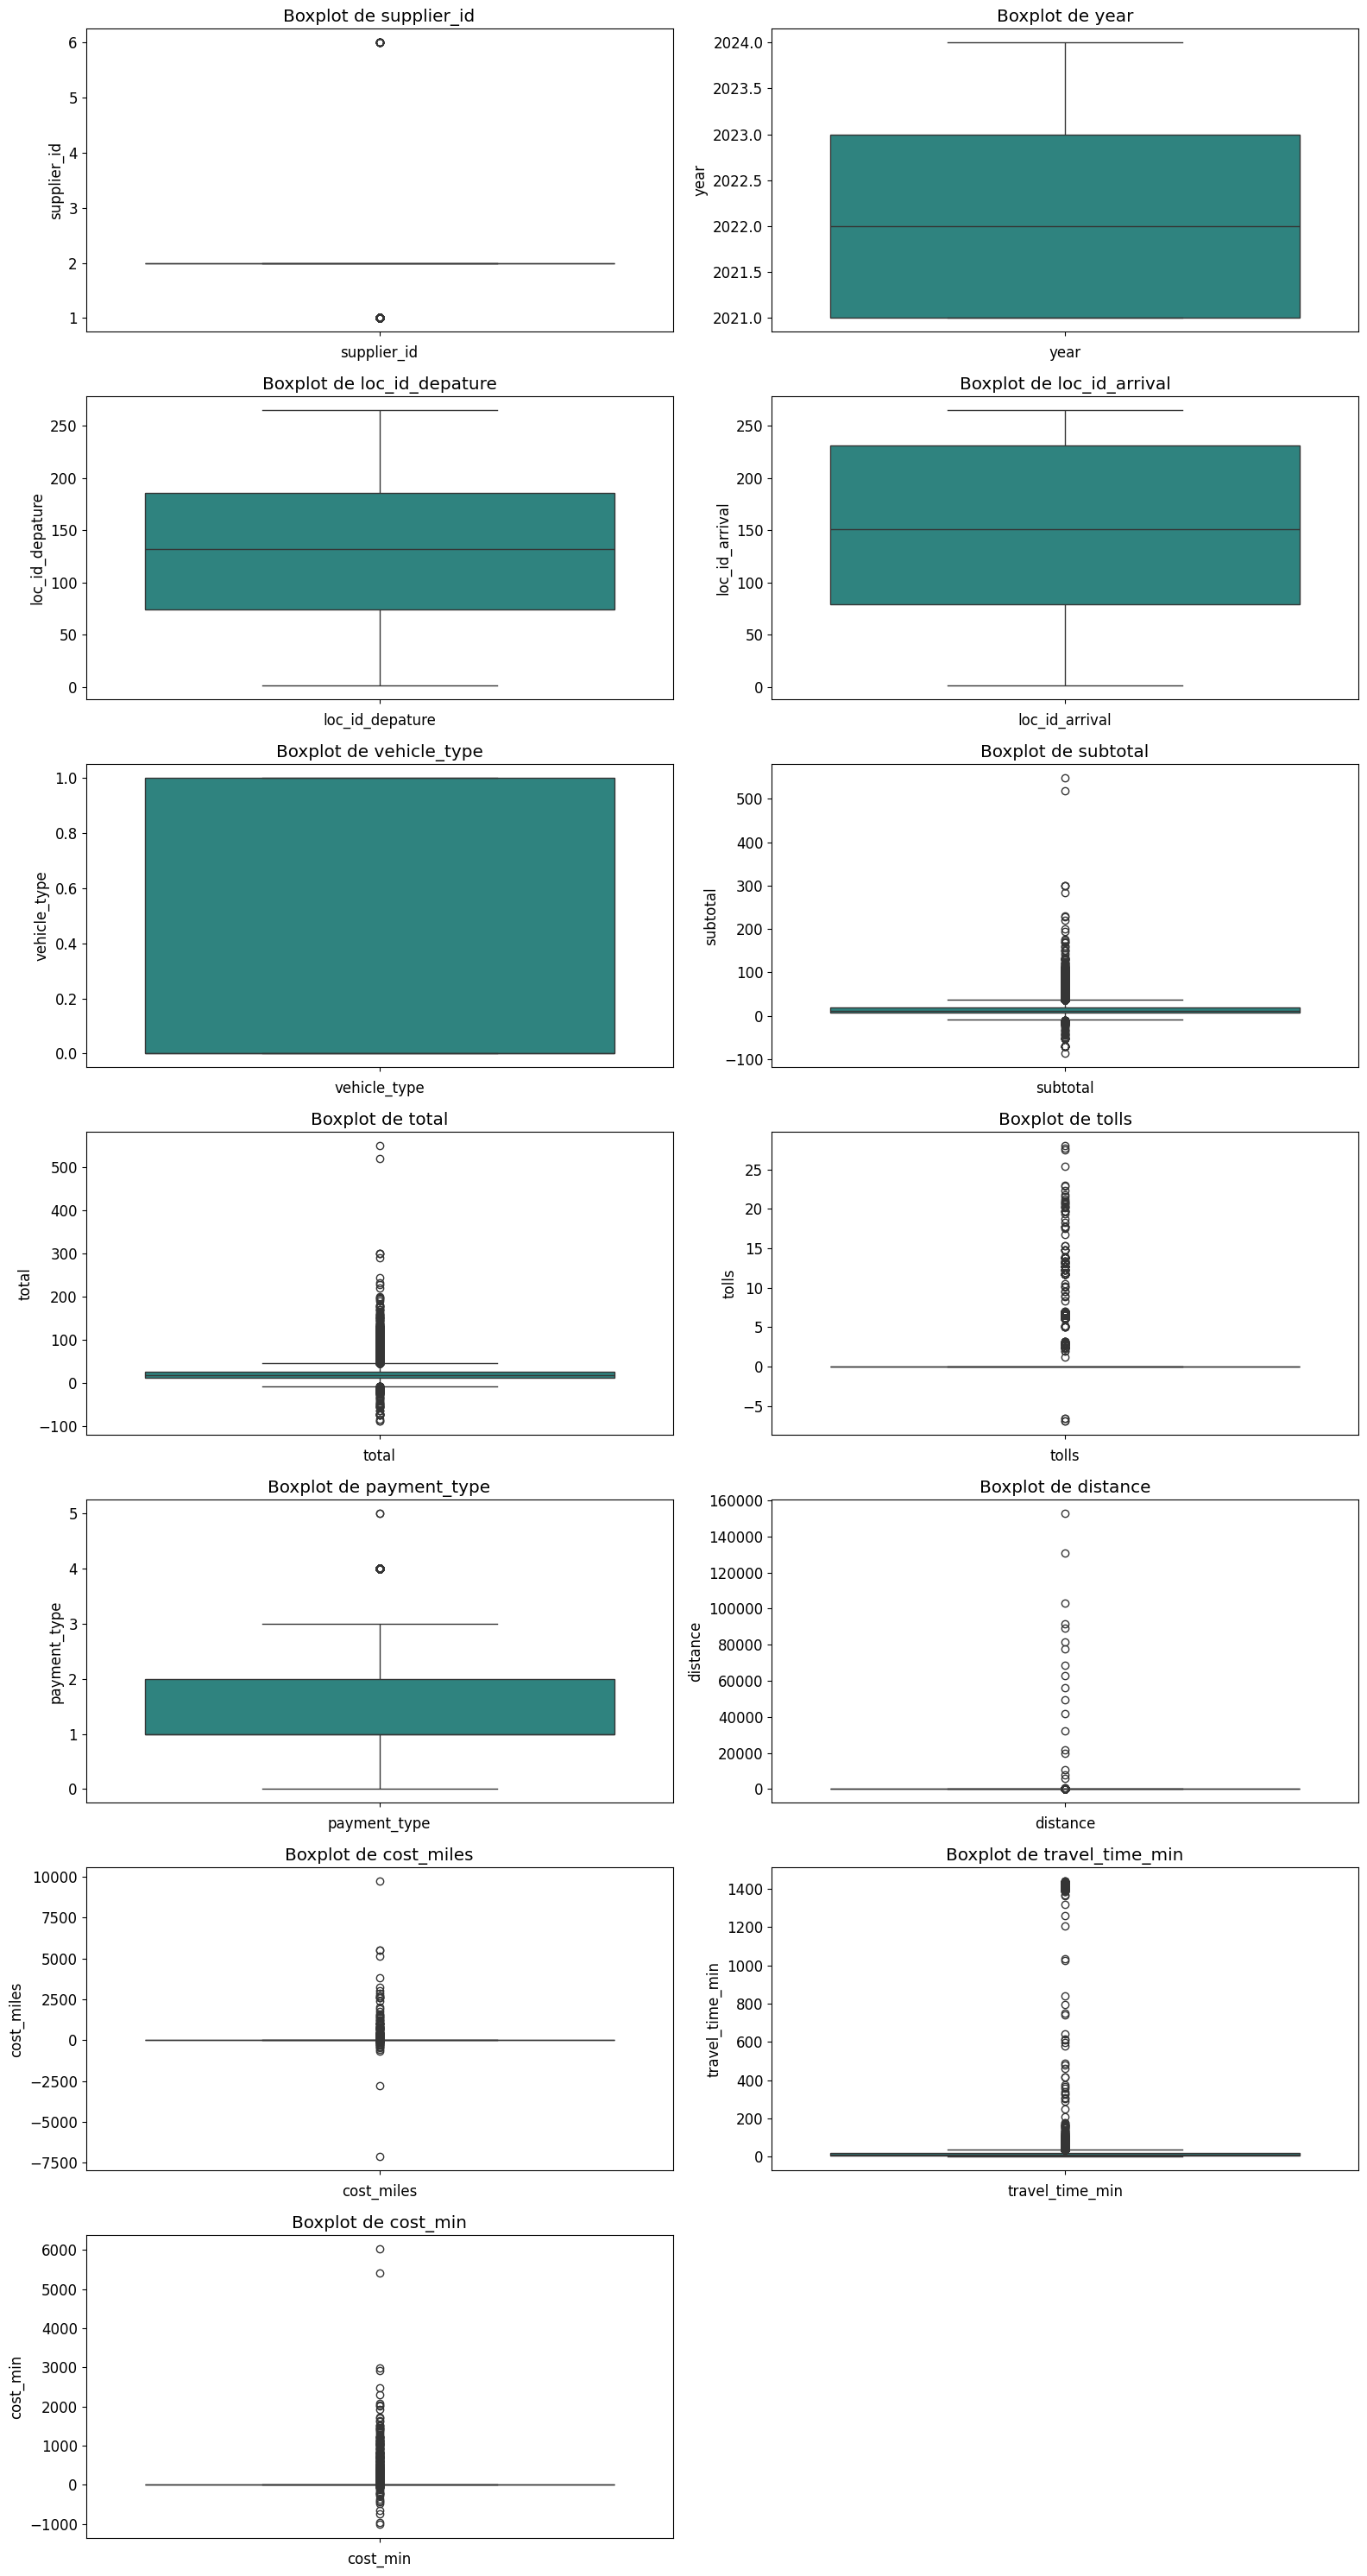

In [94]:
numerical_columns = ['supplier_id', 'year', 'loc_id_depature', 'loc_id_arrival', 'vehicle_type', 
                     'subtotal', 'total', 'tolls', 'payment_type', 'distance', 
                     'cost_miles', 'travel_time_min', 'cost_min']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 30))
axes = axes.flatten()
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(data=trip[column], ax=ax, palette='viridis')
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel(column)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()


#### **Interpretación de cada boxplot**
##### supplier_id, loc_id_departure, loc_id_arrival, vehicle_type, payment_type: 
Estos boxplots muestran una línea horizontal muy cercana al mínimo y al máximo, indicando que la mayoría de los datos están concentrados en un rango muy estrecho. Esto sugiere que hay un número limitado de proveedores, ubicaciones y tipos de vehículos que dominan el conjunto de datos. También puede indicar que la codificación de estas variables podría ser numérica pero representar categorías.
##### year: 
El boxplot del año muestra una distribución bastante uniforme, lo que indica que los datos se recolectaron en un rango de años relativamente corto, sin una concentración significativa en un año en particular.
##### month, day_name: 
(Aunque no se muestran en las imágenes) Estos boxplots probablemente mostrarían una distribución más uniforme, a menos que haya algún sesgo estacional en los datos.
##### subtotal, total, tolls, distance, cost_miles, travel_time_min, cost_min: 
Estos boxplots muestran una distribución sesgada a la derecha, con muchos valores bajos y algunos valores atípicos muy altos. Esto indica que la mayoría de los viajes son cortos, baratos y tienen tiempos de viaje cortos, pero hay algunos viajes que son mucho más largos, costosos y duran más tiempo.

# 4.2 Análisis Bivariado

In [95]:
trip.head()

,supplier_id,date,year,month,day_name,departure_time,arrival_time,loc_id_depature,district_depature,loc_id_arrival,...,vehicle_type,subtotal,total,tolls,payment_type,distance,cost_miles,travel_time_min,cost_min,Distancia_rango_millas
0,2,2021-01-01,2021,January,Friday,2021-01-01 00:12:57,2021-01-01 23:27:19,260,Manhattan,223,...,0,10.5,11.80,0.0,2.0,2.65,4.452830,1394.366667,0.008463,0-3 millas
1,2,2021-01-01,2021,January,Friday,2021-01-01 00:25:24,2021-01-01 00:37:38,151,Queens,74,...,0,11.5,12.80,0.0,2.0,2.60,4.923077,12.233333,1.046322,0-3 millas
2,2,2021-01-01,2021,January,Friday,2021-01-01 06:12:44,2021-01-01 06:31:09,152,Queens,164,...,1,22.5,26.05,0.0,2.0,6.75,3.859259,18.416667,1.414480,6-12 millas
3,2,2021-01-01,2021,January,Friday,2021-01-01 08:08:43,2021-01-01 08:22:06,130,Queens,130,...,1,13.0,13.80,0.0,2.0,3.28,4.207317,13.383333,1.031133,3-6 millas
4,2,2021-01-01,2021,January,Friday,2021-01-01 08:12:30,2021-01-01 08:45:29,197,Manhattan,86,...,1,36.0,39.55,0.0,1.0,11.69,3.383234,32.983333,1.199090,6-12 millas


In [111]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   supplier_id             33668 non-null  int64   
 1   date                    33668 non-null  object  
 2   year                    33668 non-null  int64   
 3   month                   33668 non-null  object  
 4   day_name                33668 non-null  object  
 5   departure_time          33668 non-null  object  
 6   arrival_time            33668 non-null  object  
 7   loc_id_depature         33668 non-null  int64   
 8   district_depature       33668 non-null  object  
 9   loc_id_arrival          33668 non-null  int64   
 10  district_arrival        33668 non-null  object  
 11  vehicle_type            33668 non-null  int64   
 12  subtotal                33668 non-null  float64 
 13  total                   33668 non-null  float64 
 14  tolls                 

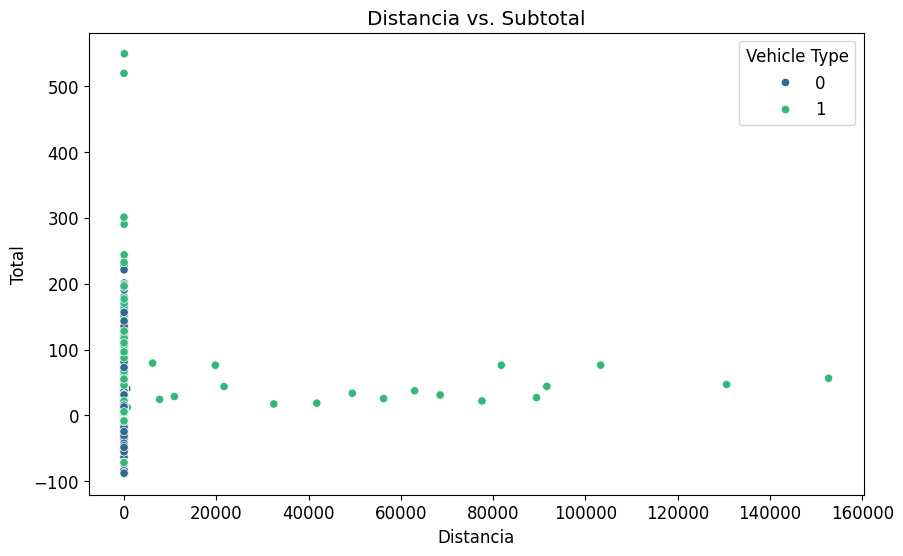

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='total', data=trip, hue='vehicle_type', palette='viridis')
plt.title('Distancia vs. Subtotal')
plt.xlabel('Distancia')
plt.ylabel('Total')
plt.legend(title='Vehicle Type')
plt.show()

##### Relación entre distancia y subtotal: 
En general, parece haber una tendencia positiva entre la distancia y el subtotal. Esto significa que, a medida que aumenta la distancia de un viaje, también tiende a aumentar el costo total. Sin embargo, esta relación no es perfecta, ya que hay muchos puntos que no siguen esta tendencia exacta.
##### Impacto del tipo de vehículo: 
Los dos tipos de vehículos parecen tener un comportamiento similar en términos de la relación entre distancia y subtotal. No hay una clara separación entre los dos grupos de puntos, lo que sugiere que el tipo de vehículo podría no ser un factor determinante en el costo total del viaje, al menos en este conjunto de datos.
##### Concentración de datos: 
La mayoría de los datos se concentran en la parte inferior izquierda del gráfico, lo que indica que la mayoría de los viajes son cortos y tienen un costo total bajo.
##### Dispersión de los datos: 
Los puntos están bastante dispersos, lo que sugiere que hay una gran variabilidad en los costos de los viajes, incluso para distancias similares. Esto podría deberse a factores como el tráfico, la hora del día, el día de la semana, o tarifas especiales.

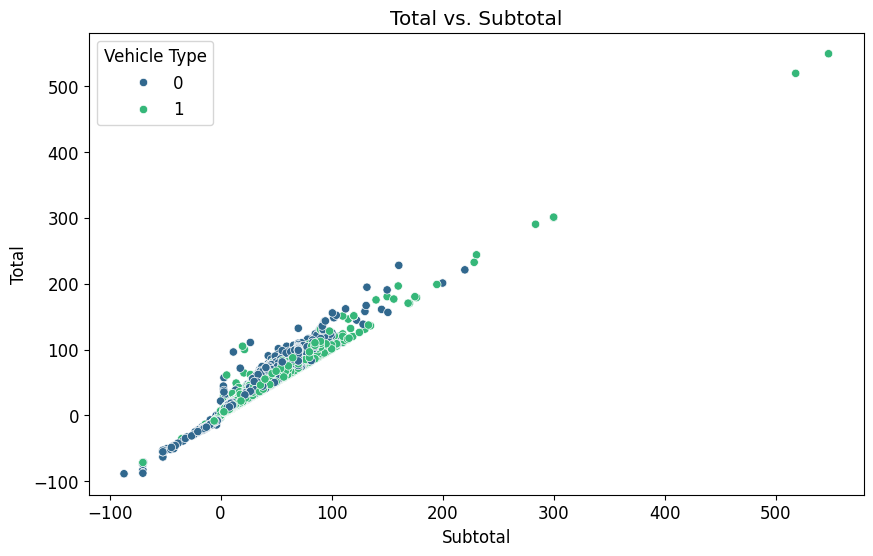

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subtotal', y='total', data=trip, hue='vehicle_type', palette='viridis')
plt.title('Total vs. Subtotal')
plt.xlabel('Subtotal')
plt.ylabel('Total')
plt.legend(title='Vehicle Type')
plt.show()

##### Relación Positiva: 
La mayoría de los puntos se distribuyen a lo largo de una línea diagonal que va de abajo a la izquierda hacia arriba a la derecha. Esto indica una relación positiva entre el Subtotal y el Total: a medida que aumenta el Subtotal, también tiende a aumentar el Total. Esto es lógico, ya que el Total suele incluir el Subtotal más otros cargos.
##### Densidad de los Puntos: 
La concentración de puntos a lo largo de la línea diagonal indica que, para la mayoría de los registros, el Total es directamente proporcional al Subtotal.
##### Tipo de Vehículo: 
Los dos colores (representando los dos tipos de vehículos) se mezclan bastante, lo que sugiere que no hay una diferencia significativa en la relación entre Subtotal y Total entre los dos tipos de vehículos. Es decir, tanto para un tipo de vehículo como para el otro, la tendencia general es que a mayor Subtotal, mayor Total.
Existe una fuerte correlación positiva entre el Subtotal y el Total.
El tipo de vehículo no parece influir significativamente en la relación entre el Subtotal y el Total, al menos en este conjunto de datos.

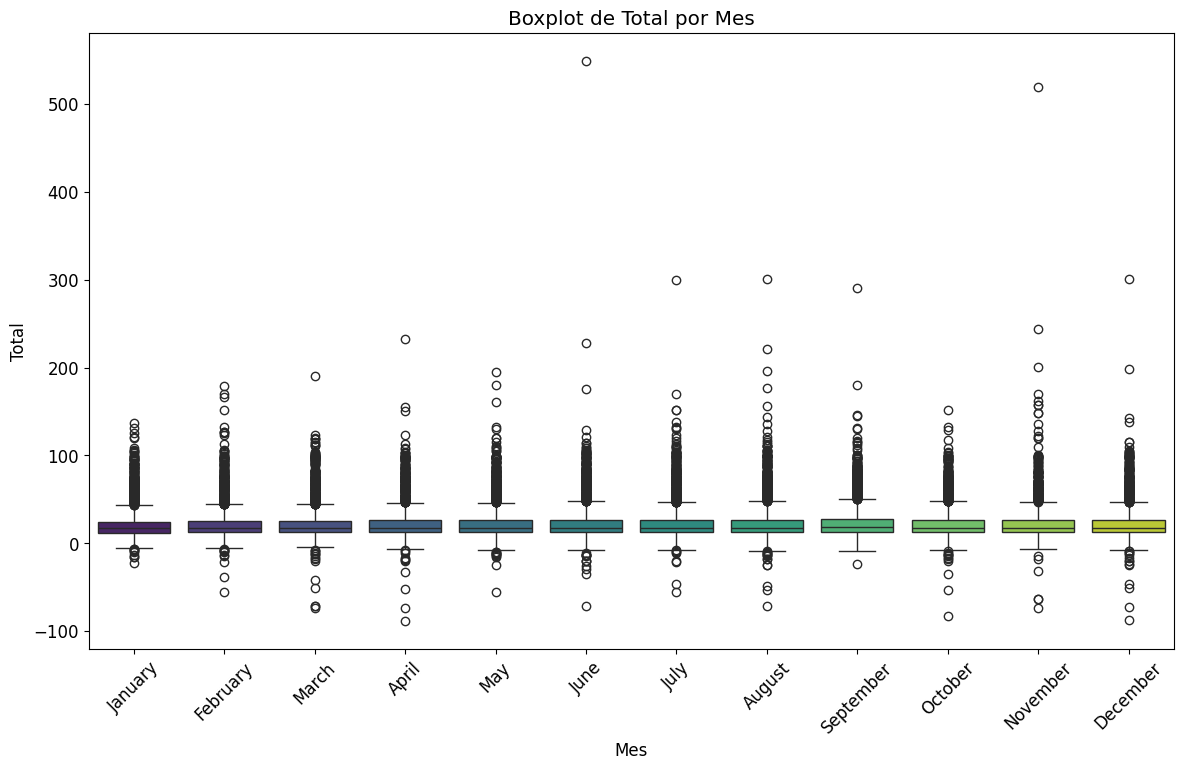

In [98]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='total', data=trip, palette='viridis')
plt.title('Boxplot de Total por Mes')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()


##### Enero: 
Los "Totales" parecen estar concentrados en valores bajos, con algunos valores atípicos (los puntos por encima de la caja).
##### Febrero: 
Similar a enero, con una concentración de valores bajos y algunos outliers.
##### Marzo, Abril, Mayo, Junio: 
En estos meses, la distribución de los "Totales" se mantiene relativamente estable, con una mediana ligeramente superior a los meses anteriores.
##### Julio: 
Se observa un ligero aumento en la mediana y una mayor dispersión de los datos, lo que indica una mayor variabilidad en los "Totales".
##### Agosto: 
La distribución se mantiene similar a julio, con una mediana ligeramente más alta.
##### Septiembre, Octubre: 
Los "Totales" vuelven a disminuir ligeramente, con una distribución más concentrada en valores más bajos.
##### Noviembre: 
Se observa un aumento significativo en la mediana, lo que sugiere un incremento en los "Totales" durante este mes.
##### Diciembre: 
La mediana se mantiene alta, pero la dispersión de los datos es mayor, lo que indica una mayor variabilidad en los "Totales" durante este mes.

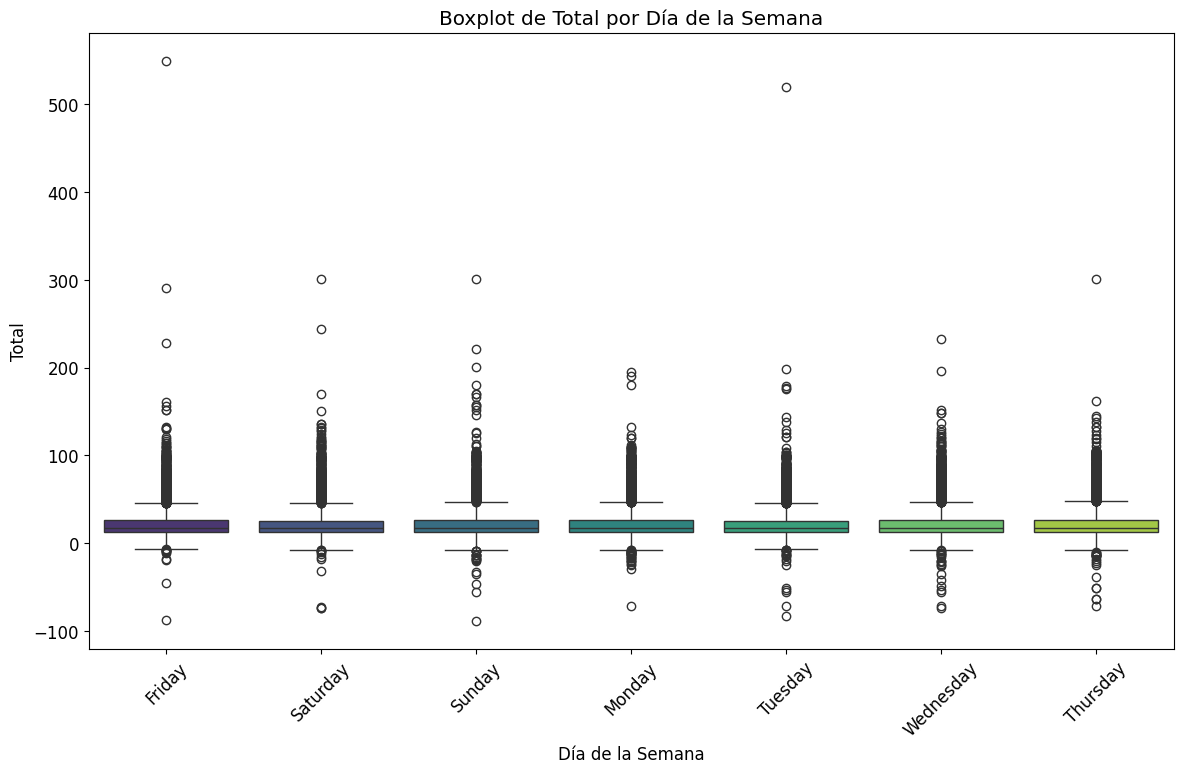

In [99]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='day_name', y='total', data=trip, palette='viridis')
plt.title('Boxplot de Total por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()


#### Interpretación de la Distribución por Día:
La mediana del "Total" parece ser similar para cada día de la semana, indicando que el nivel central del "Total" no cambia drásticamente de un día a otro.
La mayoría de los datos están agrupados en valores cercanos a cero, y los bigotes de cada caja no se extienden demasiado alto, lo que sugiere que la mayoría de los valores del "Total" están concentrados en un rango bajo.
Sin embargo, cada día tiene una buena cantidad de outliers que se extienden hacia valores mucho más altos, lo que indica que, aunque los valores centrales no cambien mucho entre los días, hay ocasiones con totales excepcionalmente altos.
#### Comparación General entre Días:
No parece haber un cambio significativo en la distribución del "Total" entre los diferentes días de la semana, aunque ciertos días como Friday y Thursday tienen algunos de los outliers más altos.
Esta estabilidad entre días podría indicar que no hay un patrón semanal evidente en el "Total", pero también muestra que existen variaciones excepcionales en todos los días de la semana.

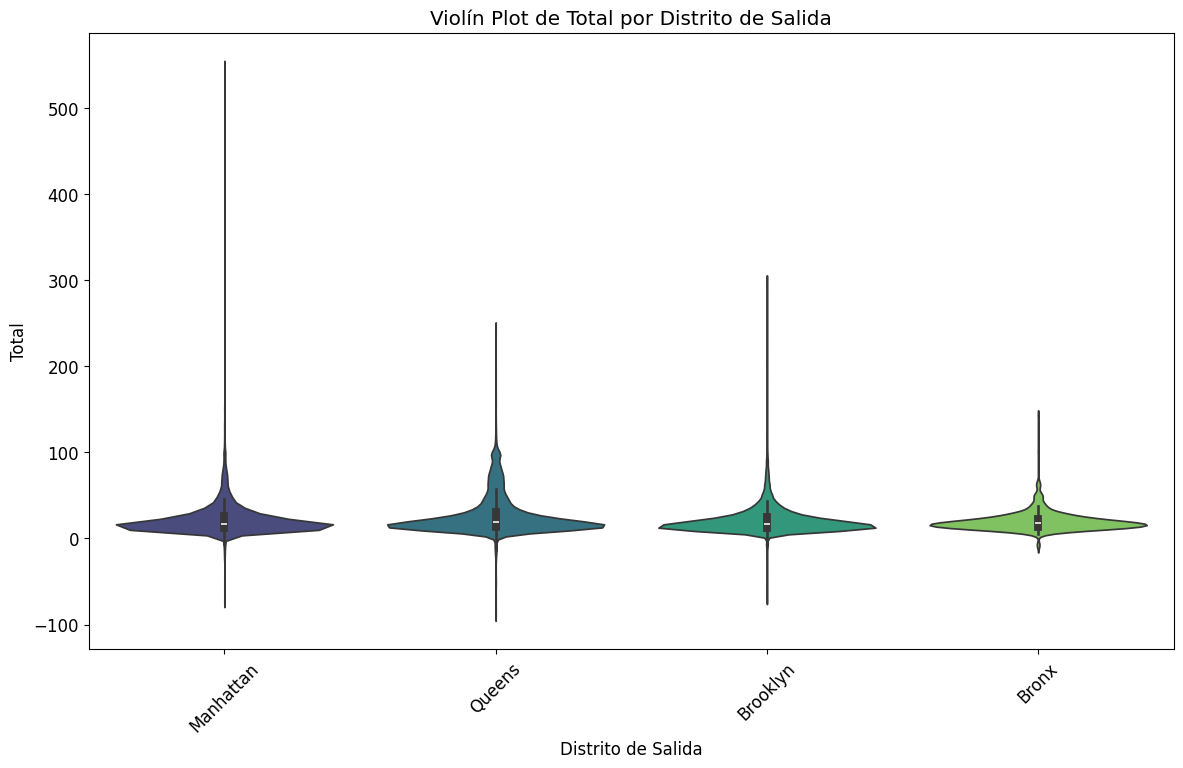

In [100]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='district_depature', y='total', data=trip, palette='viridis')
plt.title('Violín Plot de Total por Distrito de Salida')
plt.xlabel('Distrito de Salida')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()


### **Distribución en cada distrito**
#### Manhattan: 
Este distrito tiene una distribución que se extiende hasta valores bastante altos, superando los 500. Esto indica que Manhattan tiene tanto valores bajos como algunos muy altos, sugiriendo una mayor variabilidad en los totales de salida desde este distrito.
#### Queens y Brooklyn: 
Tienen distribuciones más contenidas y concentradas en valores más bajos, pero también muestran cierta variabilidad. Al igual que Manhattan, estas áreas también presentan algunos valores altos, aunque en menor medida.
#### Bronx: 
Tiene una distribución aún más compacta y concentrada en valores bajos, con poca variabilidad. Esto sugiere que las salidas desde el Bronx tienen totales más bajos y con menos valores extremos.
#### Mediana y rango intercuartílico: 
En cada violín, la línea blanca representa la mediana y el rectángulo muestra el rango intercuartílico. Los valores de la mediana están cerca de cero en todos los distritos, lo cual sugiere que la mayoría de las salidas en términos de "Total" están en niveles bajos.

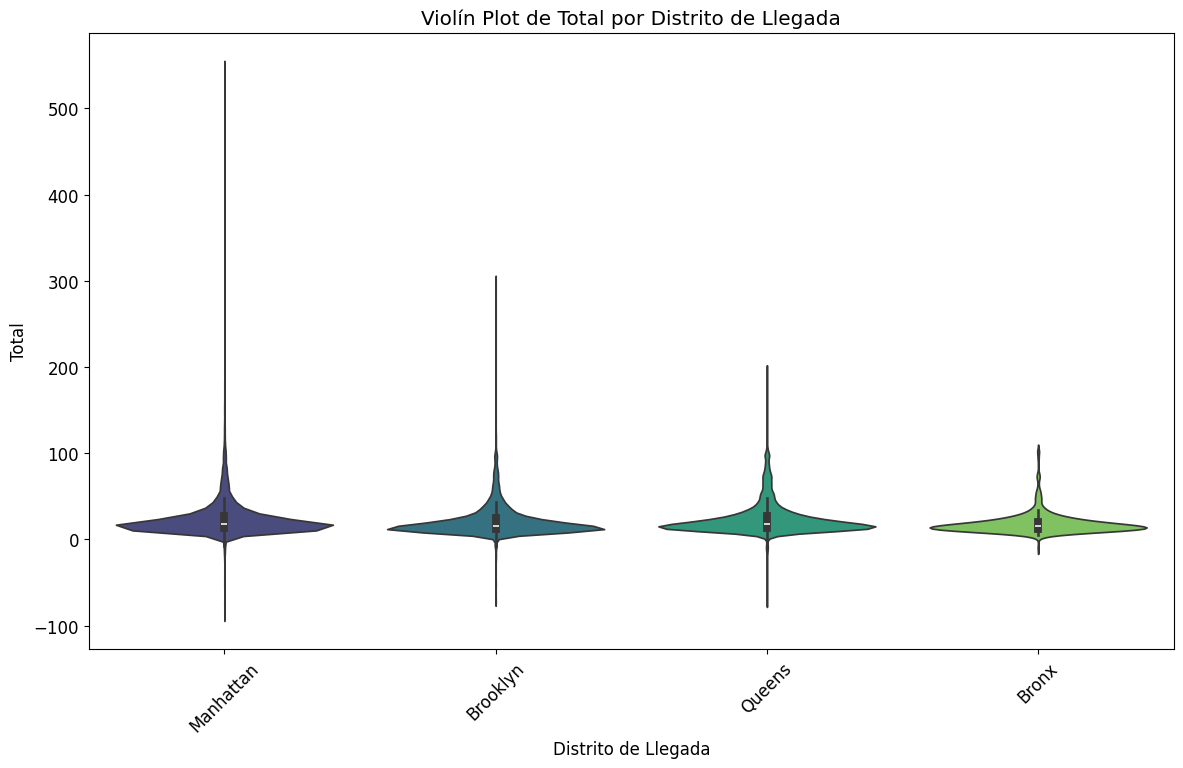

In [101]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='district_arrival', y='total', data=trip, palette='viridis')
plt.title('Violín Plot de Total por Distrito de Llegada')
plt.xlabel('Distrito de Llegada')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()


#### Manhattan: 
Tiene una distribución más extendida en el eje vertical, con valores que alcanzan hasta 500, lo que sugiere que hay una mayor variabilidad en los datos de este distrito. La distribución tiene una concentración significativa alrededor de un punto bajo, lo cual puede indicar que hay muchos valores cerca del 0, pero algunos valores mucho más altos.
#### Brooklyn, Queens, y Bronx: 
Tienen distribuciones más compactas y valores que generalmente no se extienden tan alto como en Manhattan. Esto indica menos variabilidad y posiblemente menos valores extremos en estos distritos.
#### Mediana y rango intercuartílico: 
En cada violín hay una línea blanca que representa la mediana (valor central) y un rectángulo que indica el rango intercuartílico (el 50% de los datos centrales). En todos los distritos, estos valores están relativamente cerca del cero, lo que sugiere que la mayoría de los datos están concentrados en valores bajos.

Manhattan parece tener una mayor cantidad de casos extremos o valores altos, lo cual podría reflejar una mayor actividad en comparación con los otros distritos.
Los otros distritos tienen distribuciones más controladas y concentradas en valores más bajos, sugiriendo menos variabilidad en los totales.

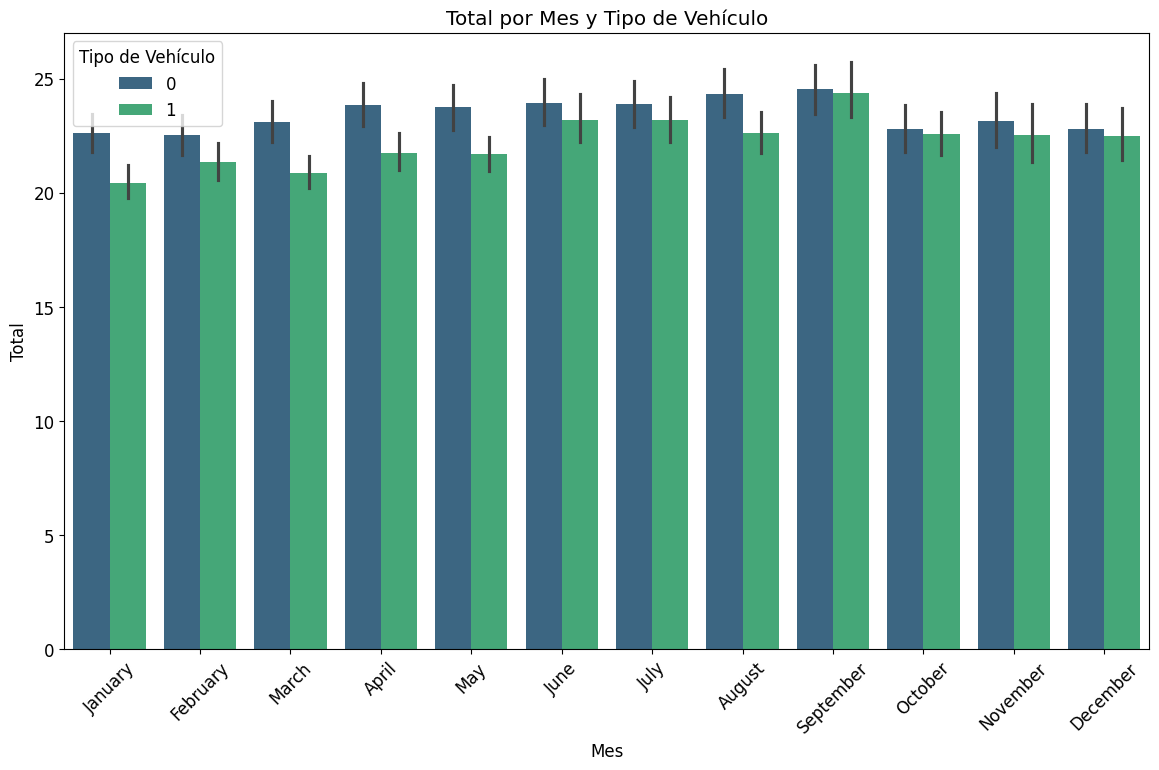

In [102]:
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='total', hue='vehicle_type', data=trip, palette='viridis')
plt.title('Total por Mes y Tipo de Vehículo')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.legend(title='Tipo de Vehículo')
plt.xticks(rotation=45)
plt.show()


#### Tendencia general: 
Ambos tipos de vehículos muestran una tendencia similar a lo largo del año, con algunas fluctuaciones mensuales.
#### Comparación entre tipos de vehículos: 
En la mayoría de los meses, el vehículo ecológico tiene un total ligeramente superior al vehiculo regular. Sin embargo, esta diferencia no es muy grande y parece mantenerse relativamente constante a lo largo del año.
#### Variaciones mensuales: 
Podemos observar que tanto para el vehículo regular como para el vehículo ecológico hay variaciones en los totales a lo largo de los meses. Algunos meses presentan picos, mientras que otros tienen valores más bajos.
#### Estacionalidad: 
Aunque no es muy marcada, parece haber una ligera tendencia estacional en los datos. Por ejemplo, en algunos meses del año (como junio y julio) los totales tienden a ser ligeramente más altos para ambos tipos de vehículos.

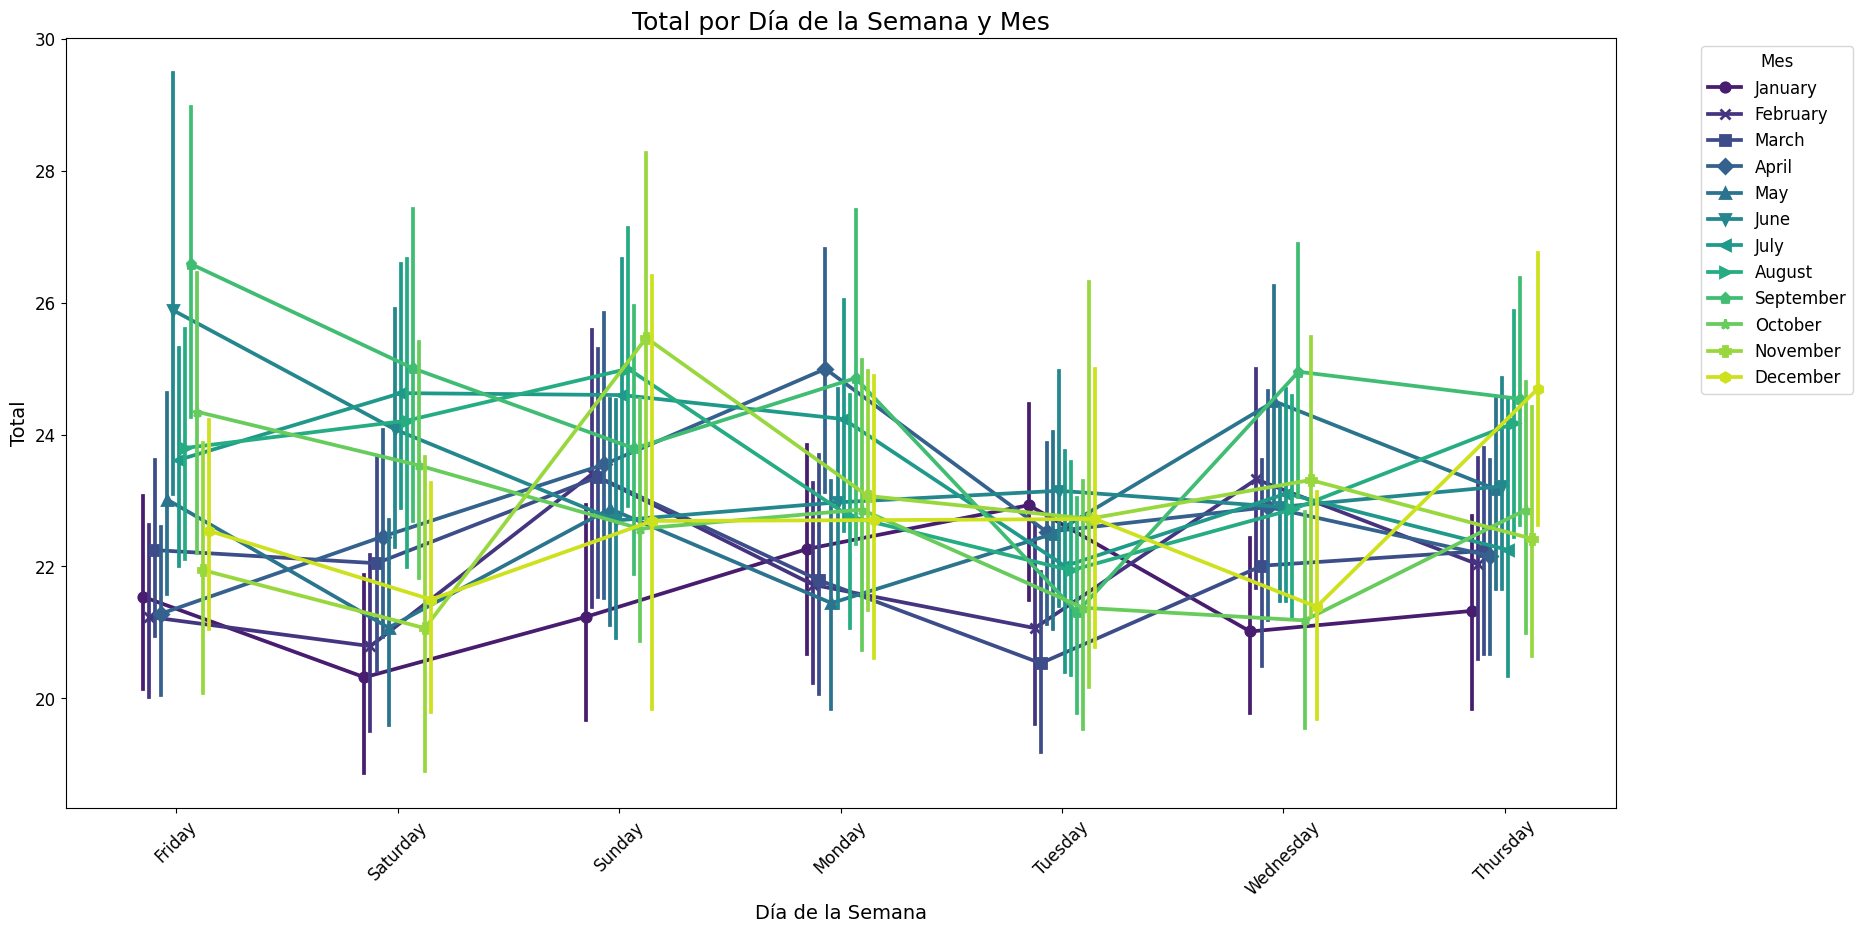

In [103]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='day_name', y='total', hue='month', data=trip, palette='viridis', dodge=True, 
              markers=["o", "x", "s", "D", "^", "v", "<", ">", "p", "*", "P", "h"])
plt.title('Total por Día de la Semana y Mes', fontsize=18)
plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


#### Fridays (Viernes):
Los viernes tienden a mostrar valores altos del "Total" en varios meses.
Por ejemplo, los meses de enero y mayo tienen líneas que tienden a ser más altas los viernes, lo que sugiere que estos meses ven un aumento en el total de actividades o transacciones los viernes.
#### Mondays (Lunes):
Los lunes tienden a tener valores más bajos del "Total" en comparación con otros días de la semana.
Los meses de junio y julio muestran consistentemente totales más bajos los lunes, indicando una posible disminución de la actividad al inicio de la semana.
#### Wednesdays (Miércoles):
Algunos meses como marzo y septiembre muestran picos en los totales los miércoles.
Esto podría indicar un aumento en la actividad a mitad de semana.
### Patrones Específicos por Mes
#### Enero (January):
Se observa un aumento significativo en los totales los viernes.
Los miércoles también presentan un incremento, aunque no tan alto como los viernes.
#### Febrero (February):
Los totales son relativamente constantes durante la semana, pero hay un ligero aumento los martes.
#### Marzo (March):
Los miércoles tienen un aumento notable en el total, mientras que los lunes y martes tienen los valores más bajos.
#### Junio (June):
Los valores más bajos se registran los lunes, con un aumento gradual hacia el viernes.
Los viernes presentan los valores más altos de la semana.
#### Julio (July):
Al igual que en junio, los lunes tienen los totales más bajos.
Se observa un aumento continuo hacia el fin de semana, con los viernes registrando los valores más altos.
### Conclusiones
#### Días de Mayor Actividad: 
Los viernes generalmente tienen los valores más altos del "Total", indicando una mayor actividad o transacciones en este día.
#### Días de Menor Actividad: 
Los lunes tienden a tener valores más bajos, sugiriendo una menor actividad al inicio de la semana.
#### Patrones Medios de Semana: 
Los miércoles muestran variabilidad con algunos meses presentando picos en la actividad.

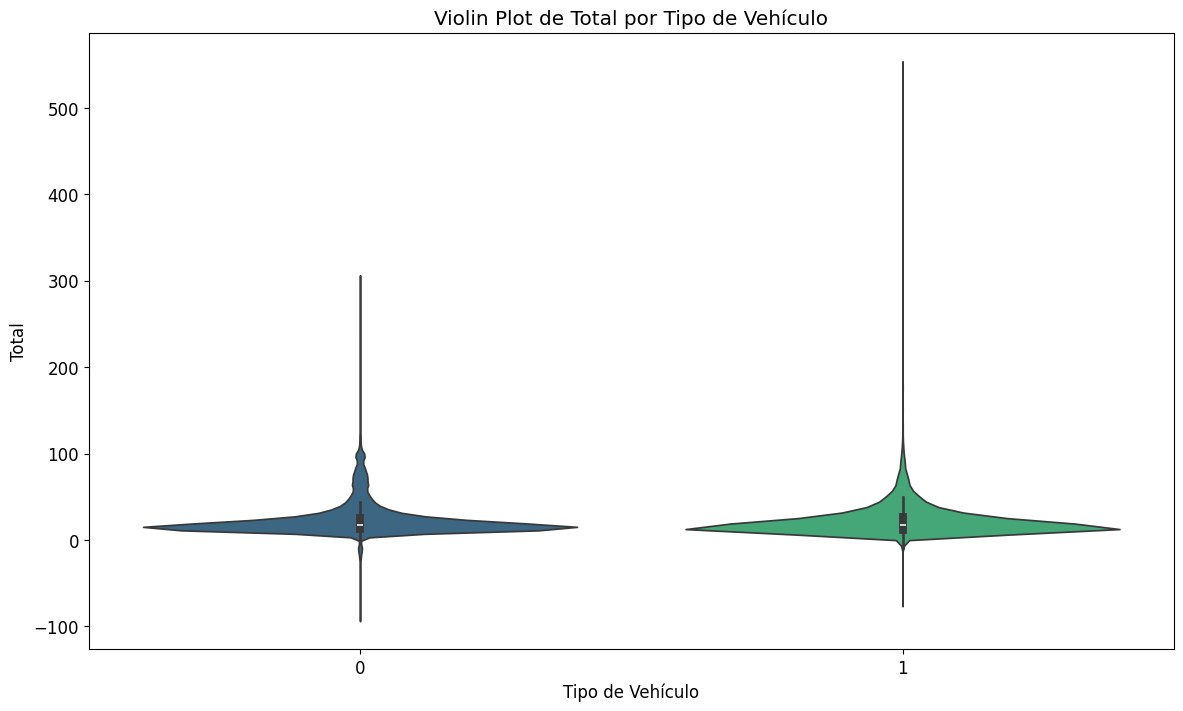

In [105]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='vehicle_type', y='total', data=trip, palette='viridis')
plt.title('Violin Plot de Total por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Total')
plt.show()


### Distribución de los datos:
#### Vehiculo ecológico: 
La distribución de los totales para el tipo de vehículo 0 se concentra en valores más bajos, con una ligera asimetría hacia la derecha (hay algunos valores muy altos).
#### Vehículo regular: 
La distribución de los totales para el tipo de vehículo 1 también se concentra en valores bajos, pero la forma del violín sugiere una distribución más simétrica.
### Comparación entre tipos de vehículos:
En general, ambos tipos de vehículos tienen una distribución similar de los totales, con una concentración en valores bajos.
Sin embargo, el vehiculo regular parece tener una ligera tendencia a tener valores totales más altos, aunque la diferencia no es muy marcada.
#### Valores atípicos: 
Los "bigotes" de los violines representan los valores extremos. En este caso, ambos tipos de vehículos tienen algunos valores atípicos muy altos.
### Conclusiones preliminares:
Ambos tipos de vehículos tienen una distribución similar de los totales, con una concentración en valores bajos.
El vehículo ecológico podría tener, en promedio, valores totales ligeramente más altos que el vehículo regular.

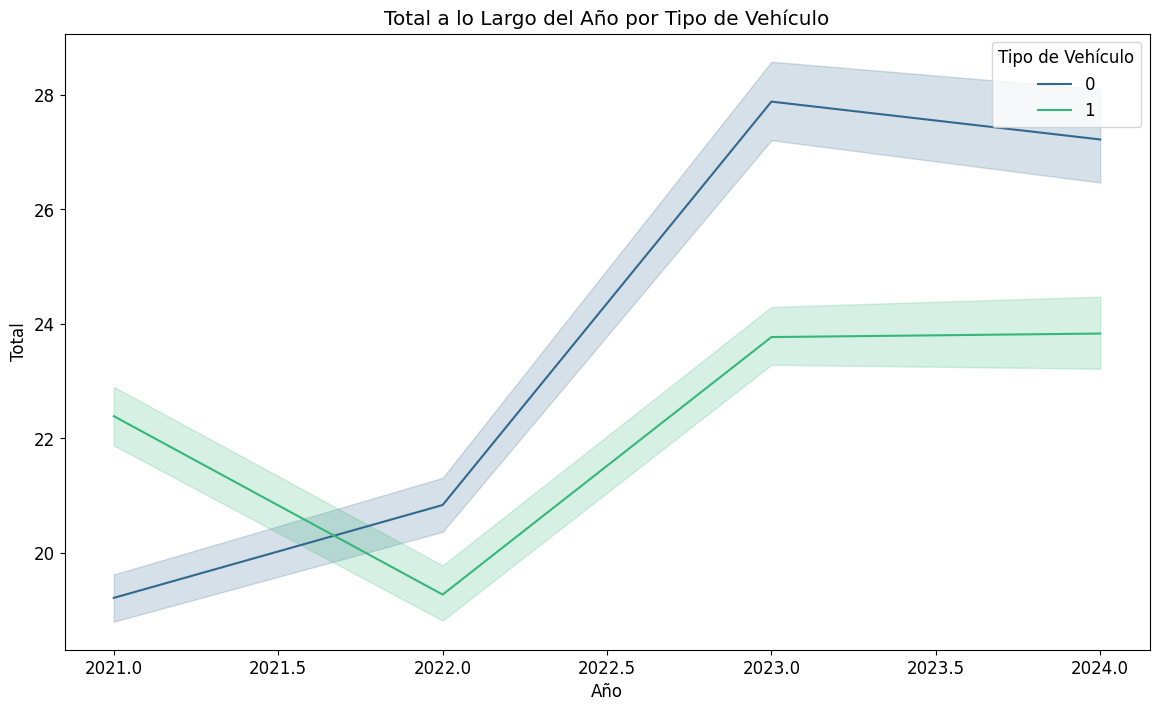

In [106]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='total', hue='vehicle_type', data=trip, palette='viridis')
plt.title('Total a lo Largo del Año por Tipo de Vehículo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend(title='Tipo de Vehículo')
plt.show()


#### Tendencia general: 
Ambos tipos de vehículos muestran una tendencia al alza a lo largo del período analizado. Sin embargo, el vehículo ecológico parece haber experimentado un crecimiento más constante y sostenido.
#### Puntos de inflexión: 
En el año 2022, se observa un cambio en la tendencia para ambos tipos de vehículos. A partir de ese año, el crecimiento se acelera.
#### Comparación entre tipos de vehículos: 
El tipo de vehículo 1 ha mantenido un valor total superior al tipo de vehículo 0 durante todo el período analizado.
#### Estabilidad: 
Las líneas relativamente rectas y las áreas sombreadas estrechas sugieren que los totales para ambos tipos de vehículos han sido bastante estables a lo largo del tiempo, con pocas fluctuaciones significativas.
### Conclusiones preliminares:
Ambos tipos de vehículos han experimentado un crecimiento en los totales a lo largo del tiempo.
El vehículo ecológico ha mostrado un desempeño ligeramente mejor que el tipo de vehículo 0.
Existe una cierta estabilidad en los datos, aunque se observa un cambio en la tendencia a partir de 2022.

### **Análisis multivariado**

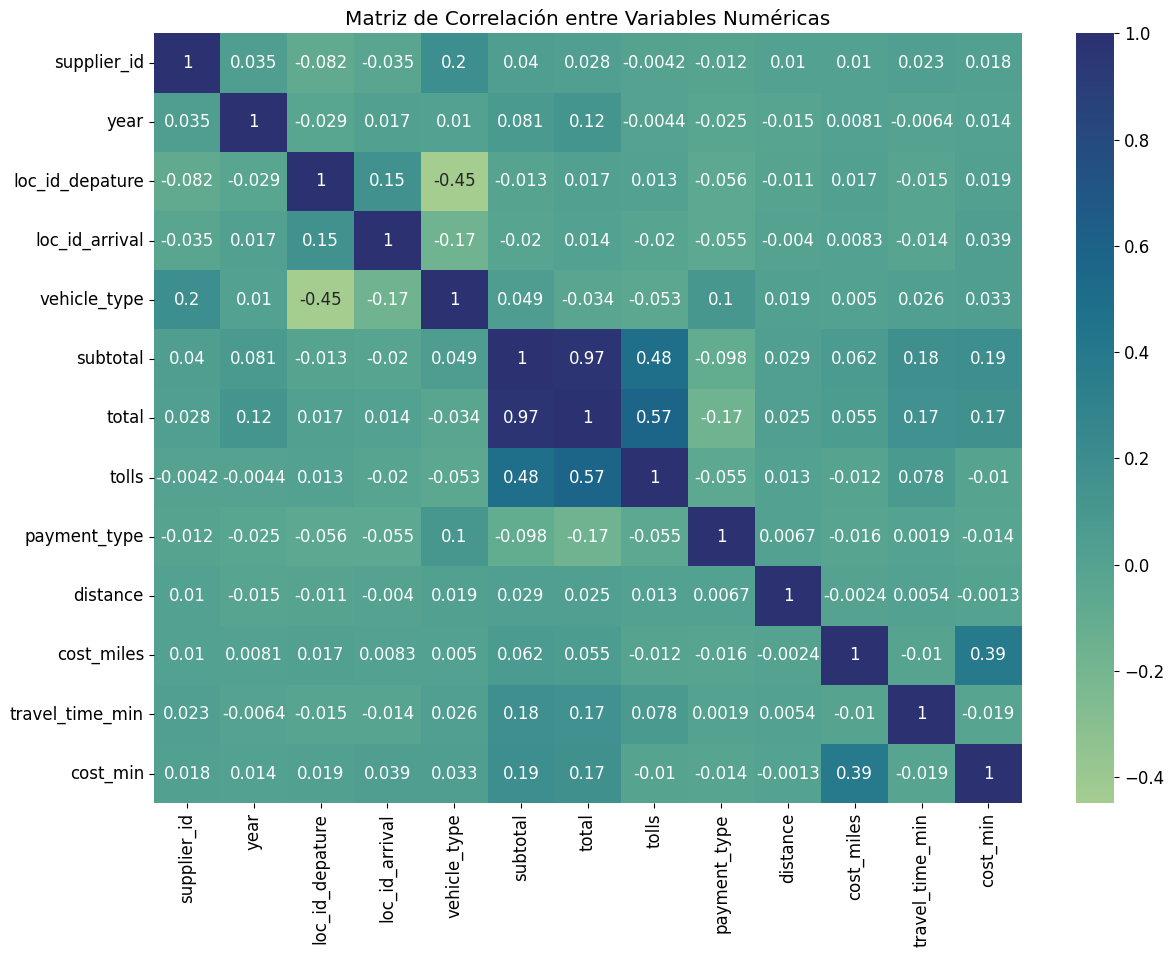

In [107]:
plt.figure(figsize=(14, 10))
correlation_matrix = trip[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

#### Subtotal y total: 
Existe una correlación casi perfecta (0.97). Esto es lógico, ya que el total suele ser una suma de varios componentes, incluido el subtotal.
#### Subtotal, total y tolls: 
Estas variables tienen una alta correlación positiva entre sí, lo que sugiere que a medida que aumenta el subtotal o el total, también aumentan los peajes.
#### Distance y cost_miles: 
Existe una correlación moderada (0.39), lo que indica que a mayor distancia, mayor es el costo por milla.
#### Travel_time_min y cost_min: 
Existe una correlación moderada (0.39), lo que sugiere que a mayor tiempo de viaje, mayor es el costo por minuto.
### Correlaciones débiles:
Muchas de las otras correlaciones son débiles o cercanas a cero, lo que indica que no hay una relación lineal significativa entre esas variables.
### Correlaciones negativas:
Algunas variables muestran una correlación negativa débil, lo que significa que a medida que aumenta una variable, la otra tiende a disminuir. Por ejemplo, loc_id_departure y vehicle_type tienen una correlación negativa, lo que podría indicar que ciertos tipos de vehículos se utilizan con mayor frecuencia en determinados lugares de partida.

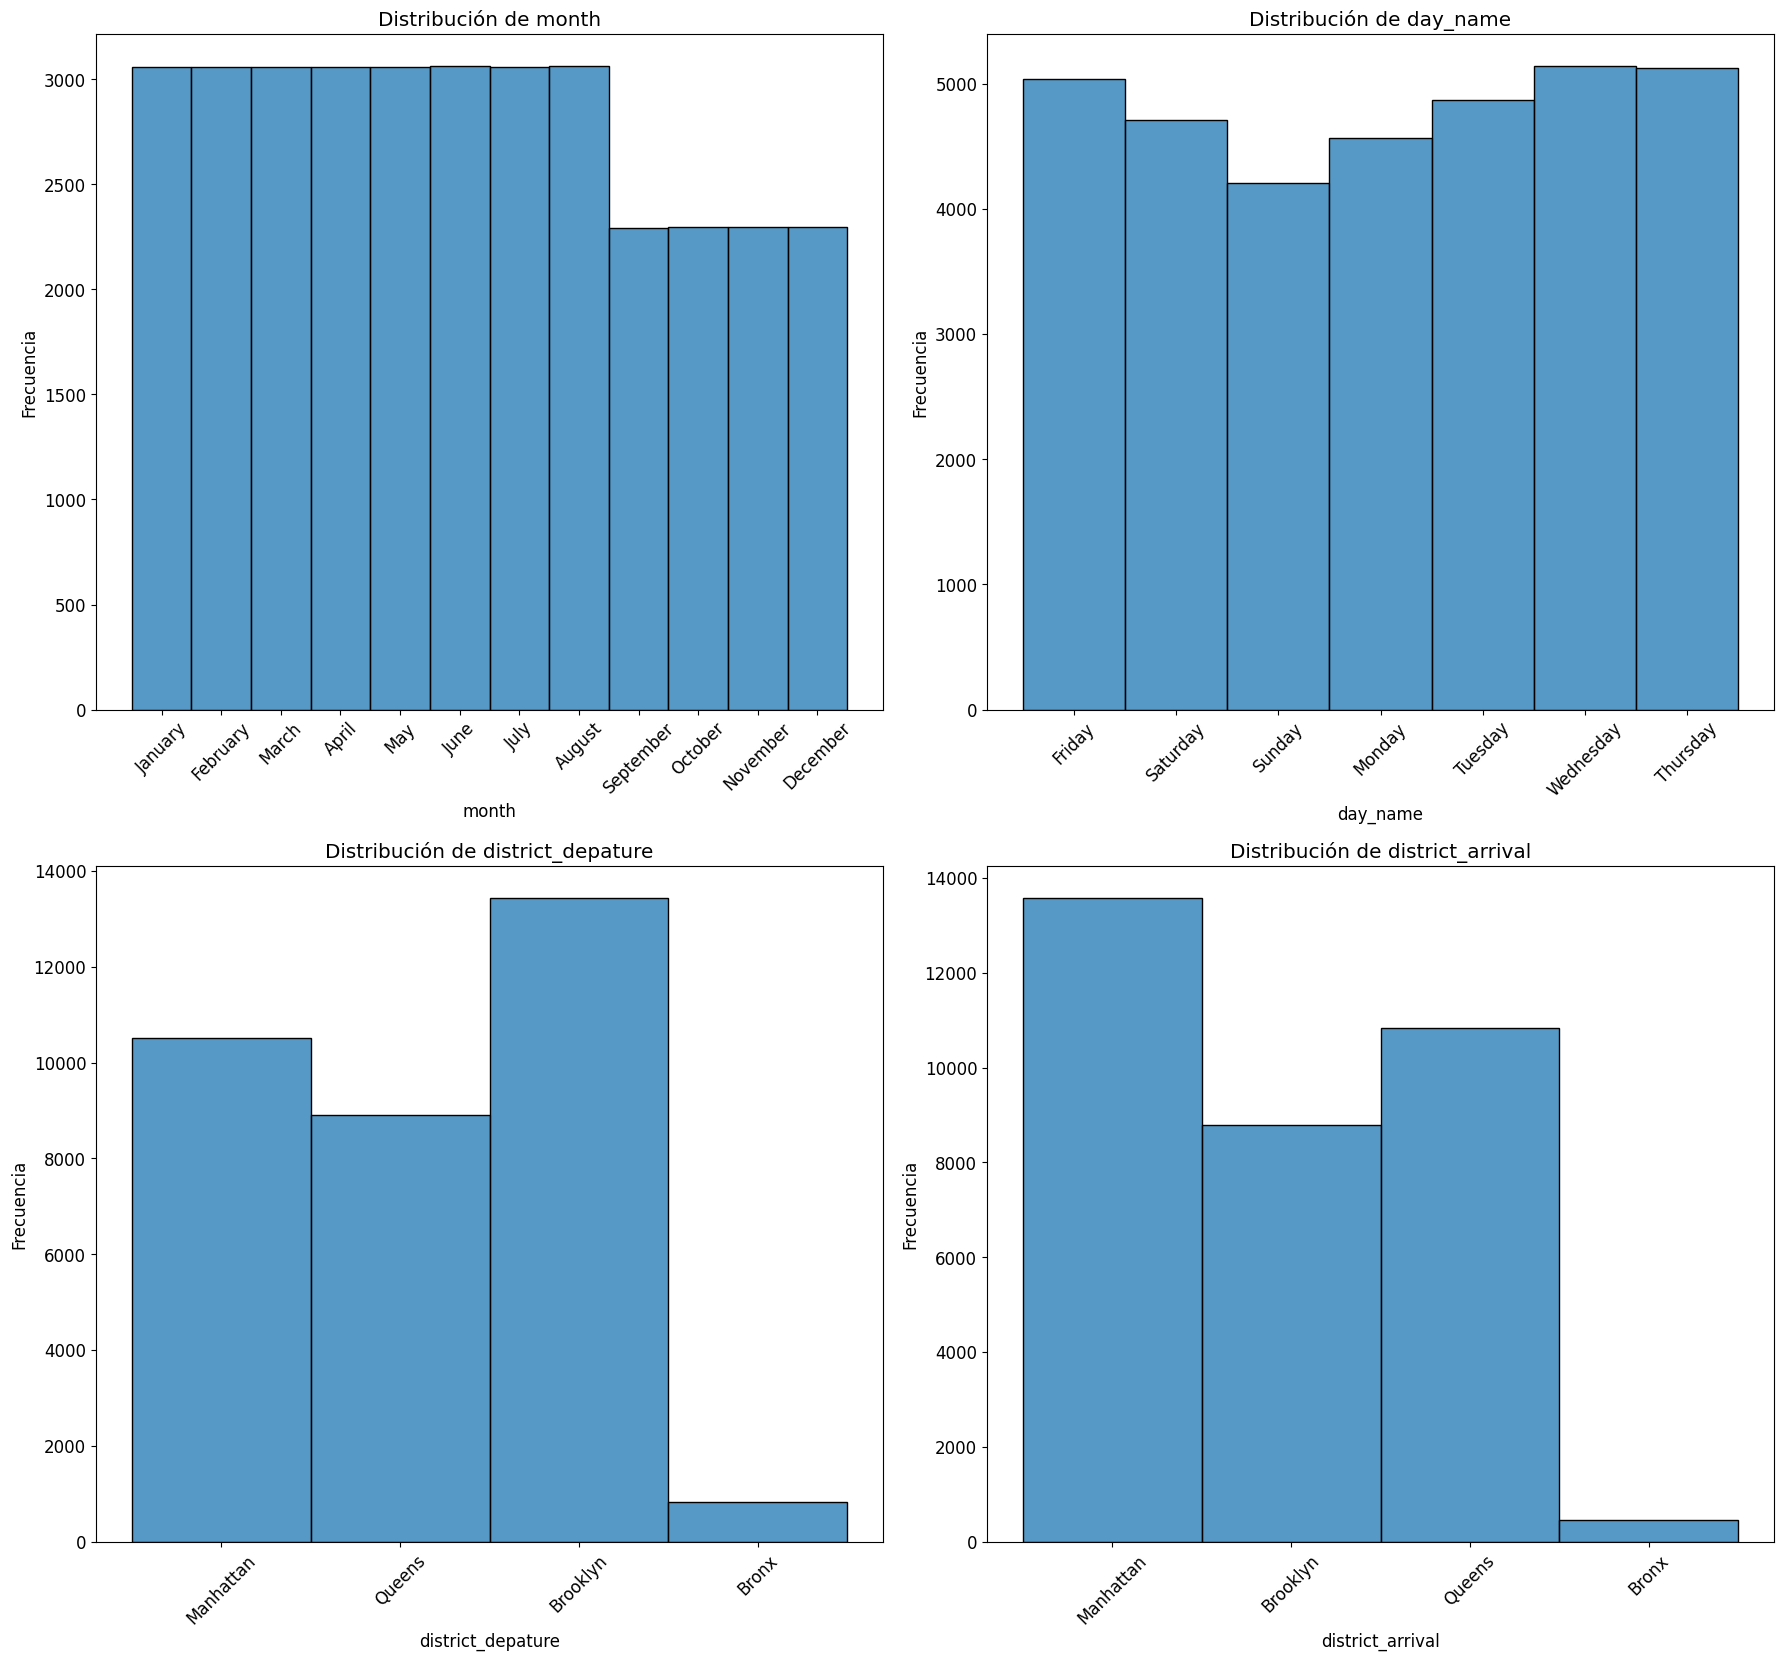

In [125]:
categorical_columns = ['month', 'day_name', 'district_depature', 'district_arrival']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24))
axes = axes.flatten()
for ax, column in zip(axes, categorical_columns):
    sns.histplot(trip[column], bins=30, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])
fig.tight_layout()
plt.show()

### Distribución de month
Enero a agosto tienen frecuencias bastante similares, cada uno alrededor de 3000.
Los últimos cuatro meses (septiembre a diciembre) tienen frecuencias ligeramente más bajas que los otros meses, pero no de manera drástica.
La distribución de datos por mes es bastante uniforme, sugiriendo que no hay una variación significativa en el "Total" a lo largo de los meses del año, salvo una ligera disminución en los últimos meses. 
### Distribución de day_name
Friday (viernes) y Thursday (jueves) tienen las frecuencias más altas.
Sunday (domingo) tiene la frecuencia más baja, lo que podría sugerir una menor actividad en este día.
Los viernes y jueves parecen ser los días más activos de la semana, mientras que los domingos tienen la menor actividad. Esto podría deberse a patrones de trabajo o hábitos sociales, donde las actividades alcanzan su punto máximo hacia el final de la semana laboral y disminuyen durante el fin de semana.
### Distribución de district_departure
Brooklyn tiene la frecuencia más alta de salidas.
Bronx tiene la frecuencia más baja.
Brooklyn es el distrito desde el cual se inician más viajes, lo que podría reflejar su densidad de población o la actividad económica en esa área.
Bronx tiene menos salidas, sugiriendo menor actividad de inicio de viajes desde este distrito en comparación con otros.
### Distribución de district_arrival
Manhattan tiene la frecuencia más alta de llegadas.
Bronx tiene la frecuencia más baja.
Manhattan es el destino más común, lo que no es sorprendente dado que es un centro económico y de negocios.
Bronx nuevamente muestra la menor frecuencia, sugiriendo menos actividad de llegada en comparación con otros distritos.
### Conclusiones Generales
Las distribuciones son bastante uniformes en muchos casos, excepto por algunas diferencias notables como la menor actividad los domingos y la alta actividad en Manhattan.
Brooklyn tiene la mayor cantidad de salidas, mientras que Manhattan es el destino más común.


### **Conclusiones**
**Variables Categóricas**

1. En la variable "supplier_id" cuenta con 3 categorias; la categoria 1 y 2 tienen una cantidad de datos reelevantes y en la categoria 6 son muy pocos. Es posible que la categoria 6 se elimine.
2. En la variable "month" los datos son consistentes hasta el mes de julio; desde el mes de agosto se evidencian datos faltantes esto sucede por que los años escogidos son desde el 2021 al mes de agosto de 2024. Para mejorar la consistencia de los datos los años que se usaran para analisis son desde el 2021 al 2023.
3. En la variable "day_name" los datos son consistentes, sin embargo puede variar al usar los años 2021 a 2023.
4. En las variables  district_depature, district_arrival y vehicle_type los datos son consistentes podrian variar un poco eliminando el año 2024 pero no seria reelevante.
5. En la variable payment_type se refiere al tipo de pago con el que el cliente cancelo el viaje. Exite un tipo dato "0" que corresponde a "sin dato", es probable que se elimine este tipo de dato.

**Variables Numéricas**
6. En la variable distance el valor máximo de 152701.68 millas sugiere que puede haber datos atípicos o errores en el registro de algunas distancias. Lo más probable es que se eliminen estos outliers

7. En la variable total, contiene un valor mínimo de -88.50 es inusualmente bajo y sugiere que hay tarifas negativas en los datos. Esto probablemente representa errores en la recopilación de datos, como registros incorrectos de tarifas o situaciones especiales en las que el costo fue erróneamente calculado como negativo. Es probable que no se tenga en cuenta y se elimine.
8. En la variable "year" los datos son consistentes hasta el año 2023; en el año 2024 se evidencian datos faltantes dado que solo se tiene datos hasta el mes de agosto. Para mejorar la consistencia de los datos los años que se usaran para analisis son desde el 2021 al 2023.

